<a href="https://colab.research.google.com/github/keithlaspona/Hypertension-CompStats/blob/master/%5BWeek_10_11%5D_NF_Experimentation_and_Coding_Hypertention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries**

In [61]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import joblib
import time
import tracemalloc
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, brier_score_loss, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.calibration import calibration_curve
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from scipy.stats import lognorm, gamma, weibull_min, ks_2samp

warnings.filterwarnings("ignore")

# **Load Dataset**

In [62]:
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/My Drive/Group 10 CompStats Files/WEEK 10-11 (Experimentation and Coding)/hypertension_dataset.csv"
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip() # Remove extra white space from columns
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Country,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Smoking_Status,Alcohol_Intake,Physical_Activity_Level,Family_History,...,Sleep_Duration,Heart_Rate,LDL,HDL,Triglycerides,Glucose,Gender,Education_Level,Employment_Status,Hypertension
0,UK,58,29.5,230,160,79,Never,27.9,Low,Yes,...,6.1,80,100,75,72,179,Female,Primary,Unemployed,High
1,Spain,34,36.2,201,120,84,Never,27.5,High,Yes,...,9.8,56,77,47,90,113,Male,Secondary,Unemployed,High
2,Indonesia,73,18.2,173,156,60,Current,1.8,High,Yes,...,5.2,75,162,56,81,101,Male,Primary,Employed,Low
3,Canada,60,20.3,183,122,94,Never,11.6,Moderate,Yes,...,7.5,71,164,93,94,199,Female,Secondary,Retired,High
4,France,73,21.8,296,91,97,Never,29.1,Moderate,Yes,...,5.0,52,108,74,226,157,Female,Primary,Employed,High


# **Exploratory Data Analysis (EDA)**

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174982 entries, 0 to 174981
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Country                  174982 non-null  object 
 1   Age                      174982 non-null  int64  
 2   BMI                      174982 non-null  float64
 3   Cholesterol              174982 non-null  int64  
 4   Systolic_BP              174982 non-null  int64  
 5   Diastolic_BP             174982 non-null  int64  
 6   Smoking_Status           174982 non-null  object 
 7   Alcohol_Intake           174982 non-null  float64
 8   Physical_Activity_Level  174982 non-null  object 
 9   Family_History           174982 non-null  object 
 10  Diabetes                 174982 non-null  object 
 11  Stress_Level             174982 non-null  int64  
 12  Salt_Intake              174982 non-null  float64
 13  Sleep_Duration           174982 non-null  float64
 14  Hear

In [64]:
# Null Values Check

print(df.isnull().sum())

Country                    0
Age                        0
BMI                        0
Cholesterol                0
Systolic_BP                0
Diastolic_BP               0
Smoking_Status             0
Alcohol_Intake             0
Physical_Activity_Level    0
Family_History             0
Diabetes                   0
Stress_Level               0
Salt_Intake                0
Sleep_Duration             0
Heart_Rate                 0
LDL                        0
HDL                        0
Triglycerides              0
Glucose                    0
Gender                     0
Education_Level            0
Employment_Status          0
Hypertension               0
dtype: int64


In [65]:
# Describe the dataset
df.describe()

,Age,BMI,Cholesterol,Systolic_BP,Diastolic_BP,Alcohol_Intake,Stress_Level,Salt_Intake,Sleep_Duration,Heart_Rate,LDL,HDL,Triglycerides,Glucose
count,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000,174982.000000
mean,53.493319,27.494672,224.539335,134.505229,89.450315,14.991069,5.013041,8.482757,6.996468,74.495085,129.528271,64.573105,149.569836,134.488187
std,20.786353,7.213866,43.361589,26.019268,17.310789,8.652624,2.582341,3.750074,1.730731,14.438573,34.635795,20.190666,57.765006,37.526882
min,18.000000,15.000000,150.000000,90.000000,60.000000,0.000000,1.000000,2.000000,4.000000,50.000000,70.000000,30.000000,50.000000,70.000000
25%,36.000000,21.200000,187.000000,112.000000,74.000000,7.500000,3.000000,5.200000,5.500000,62.000000,100.000000,47.000000,100.000000,102.000000
50%,54.000000,27.500000,225.000000,135.000000,89.000000,15.000000,5.000000,8.500000,7.000000,74.000000,130.000000,65.000000,150.000000,134.000000
75%,71.000000,33.700000,262.000000,157.000000,104.000000,22.500000,7.000000,11.700000,8.500000,87.000000,160.000000,82.000000,200.000000,167.000000
max,89.000000,40.000000,299.000000,179.000000,119.000000,30.000000,9.000000,15.000000,10.000000,99.000000,189.000000,99.000000,249.000000,199.000000


In [66]:
df.shape

(174982, 23)

In [67]:
# Columns Check
df.columns.to_list()

['Country',
 'Age',
 'BMI',
 'Cholesterol',
 'Systolic_BP',
 'Diastolic_BP',
 'Smoking_Status',
 'Alcohol_Intake',
 'Physical_Activity_Level',
 'Family_History',
 'Diabetes',
 'Stress_Level',
 'Salt_Intake',
 'Sleep_Duration',
 'Heart_Rate',
 'LDL',
 'HDL',
 'Triglycerides',
 'Glucose',
 'Gender',
 'Education_Level',
 'Employment_Status',
 'Hypertension']

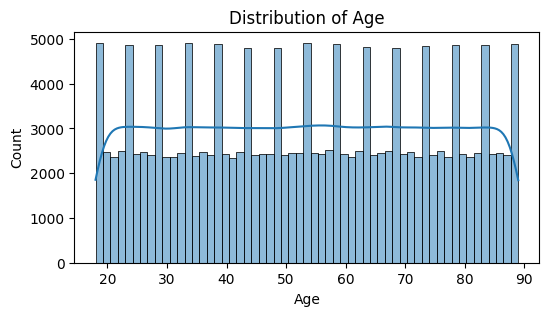

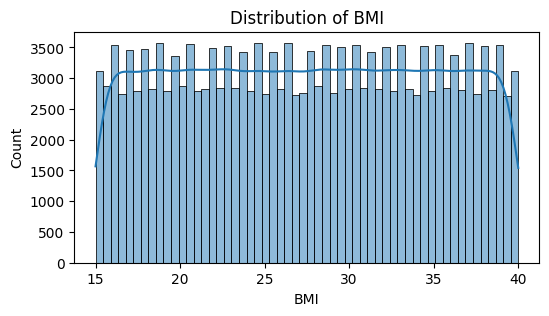

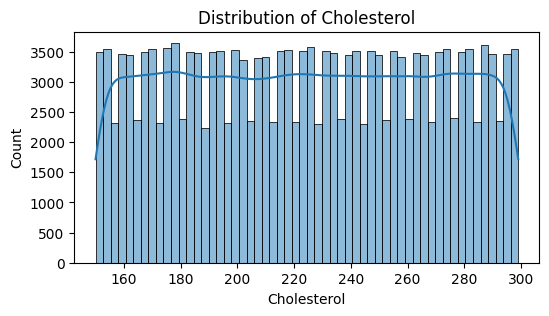

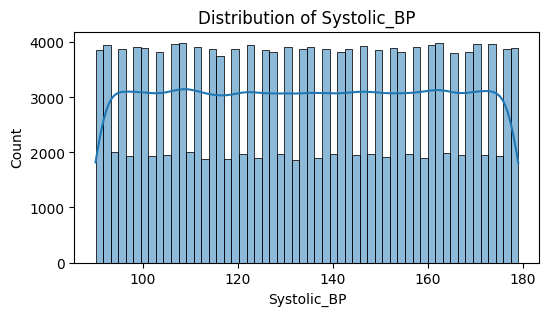

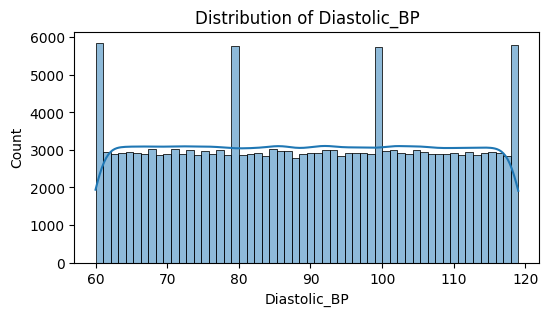

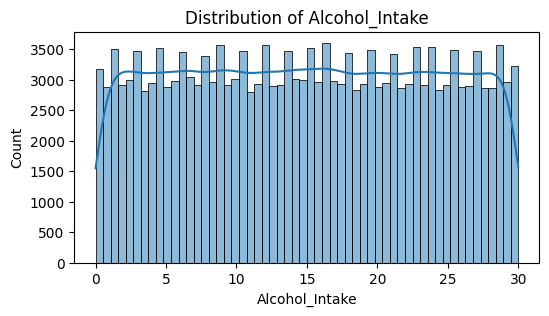

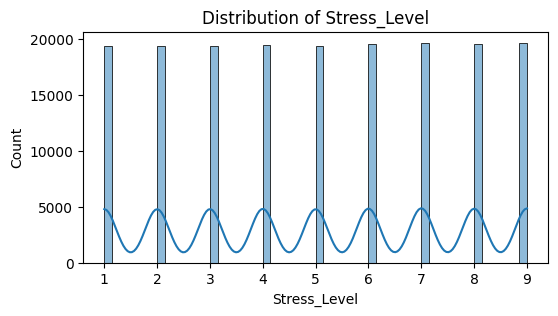

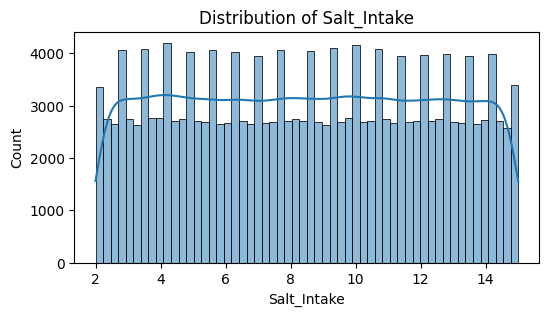

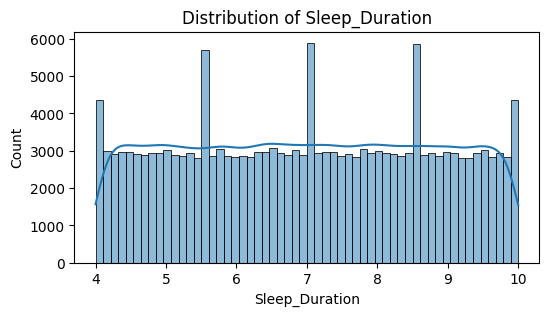

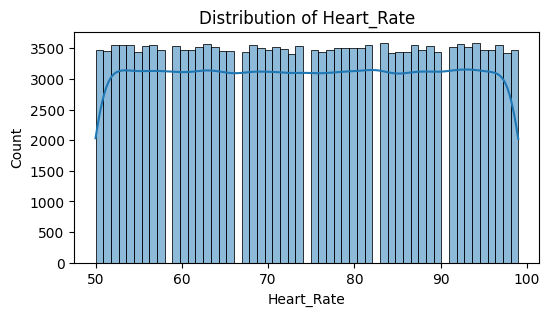

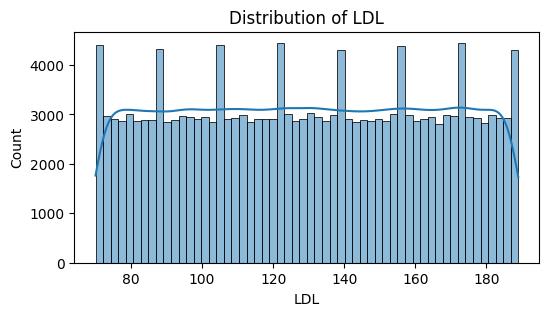

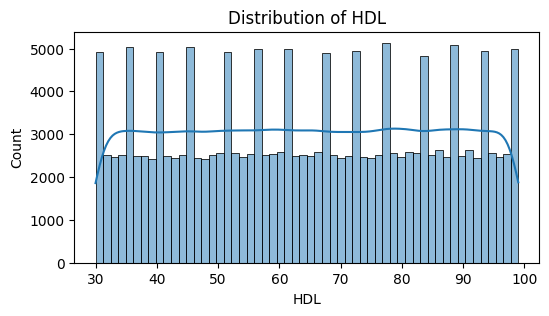

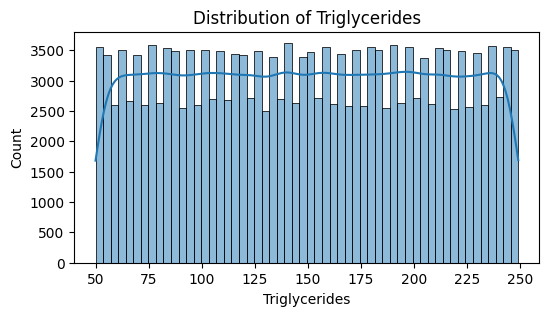

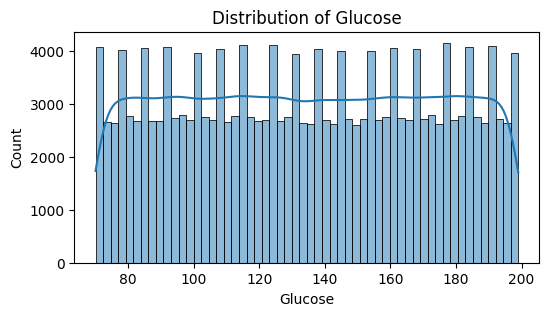

In [68]:
# Visualize distributions
num_cols = df.select_dtypes(include=['int64','float64']).columns
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
    print("\n")

Distribution of numerical features will be helpful in analyzing nature of numerical variables.

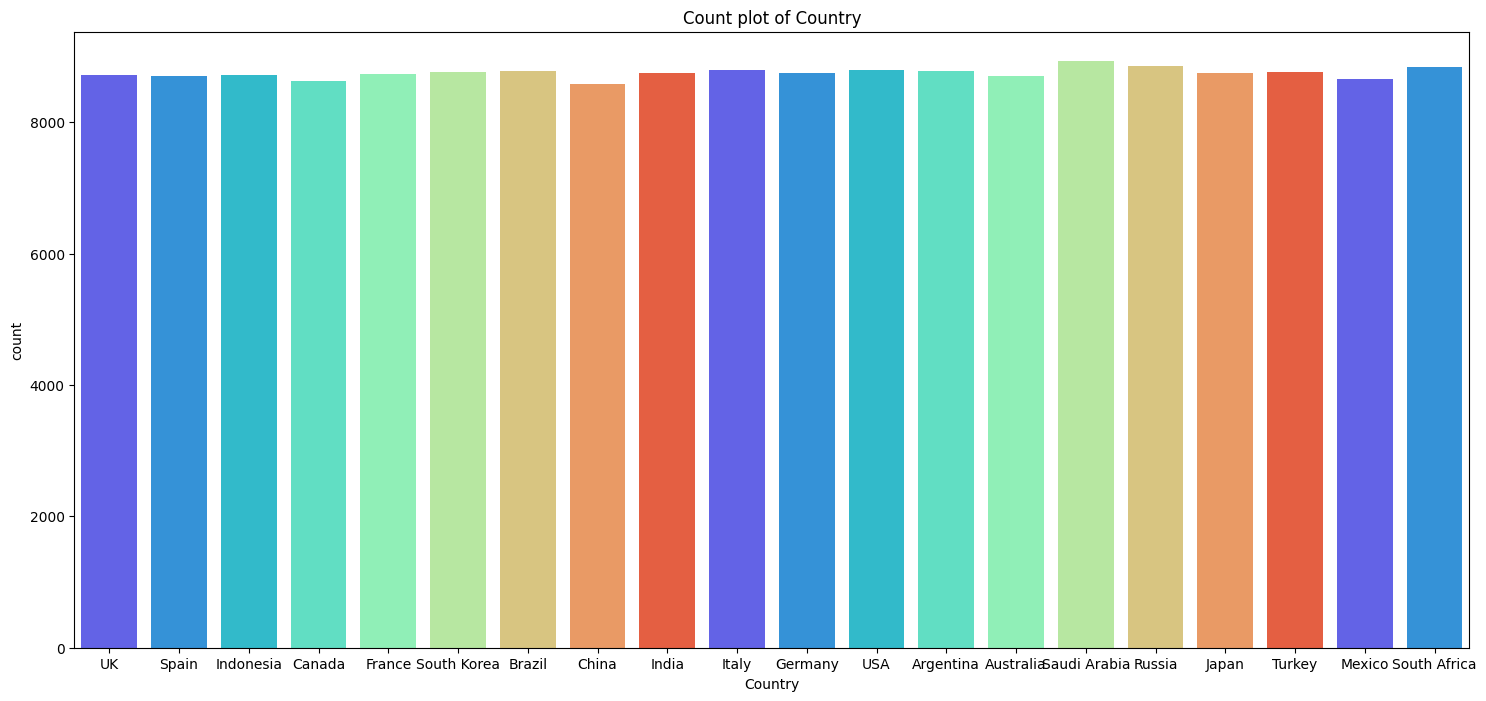

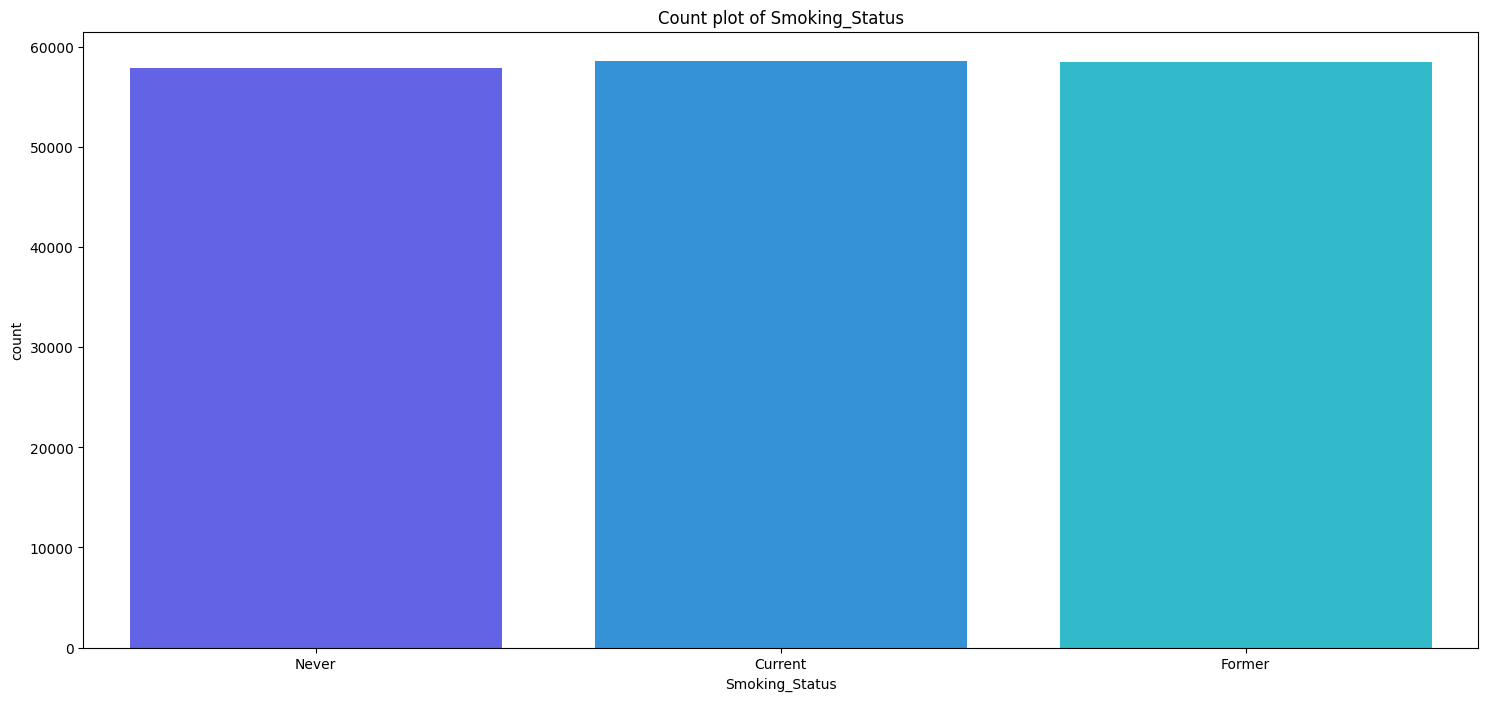

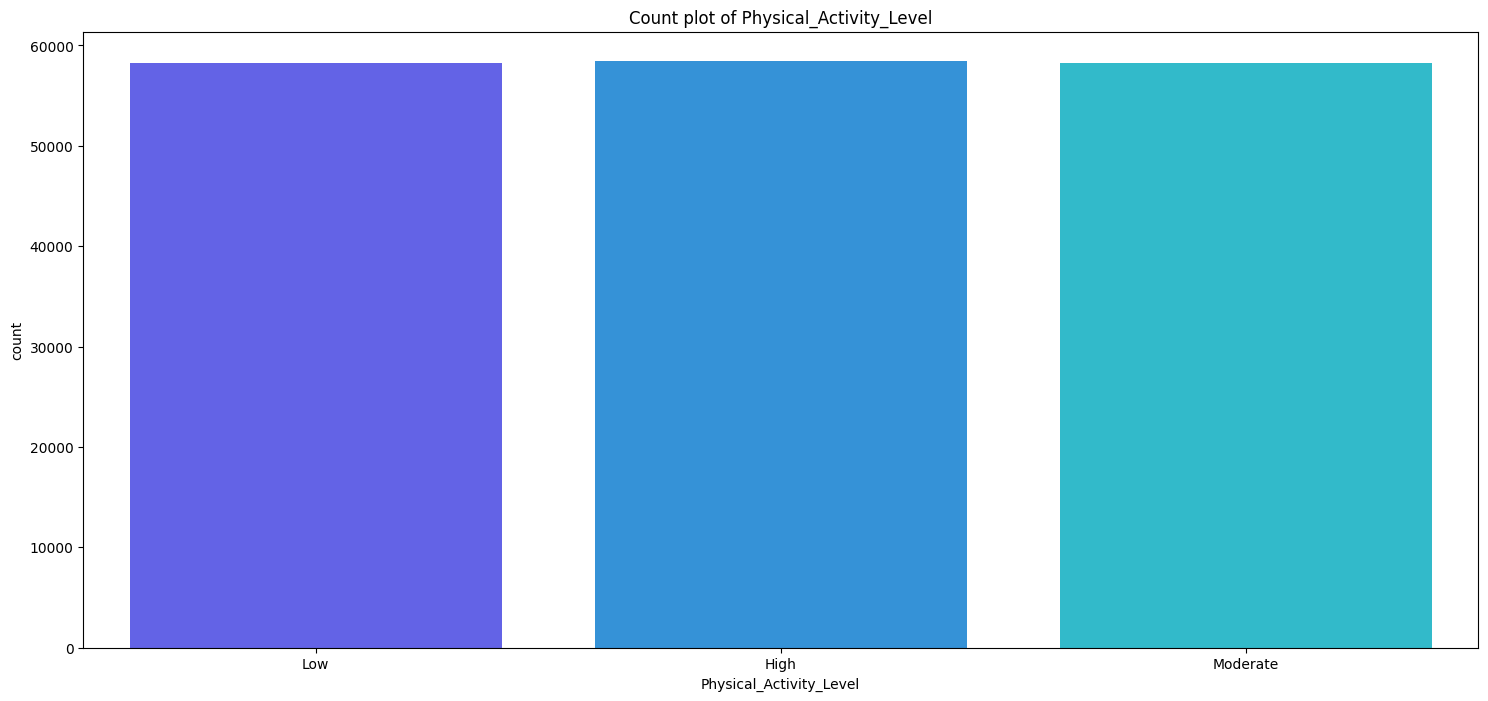

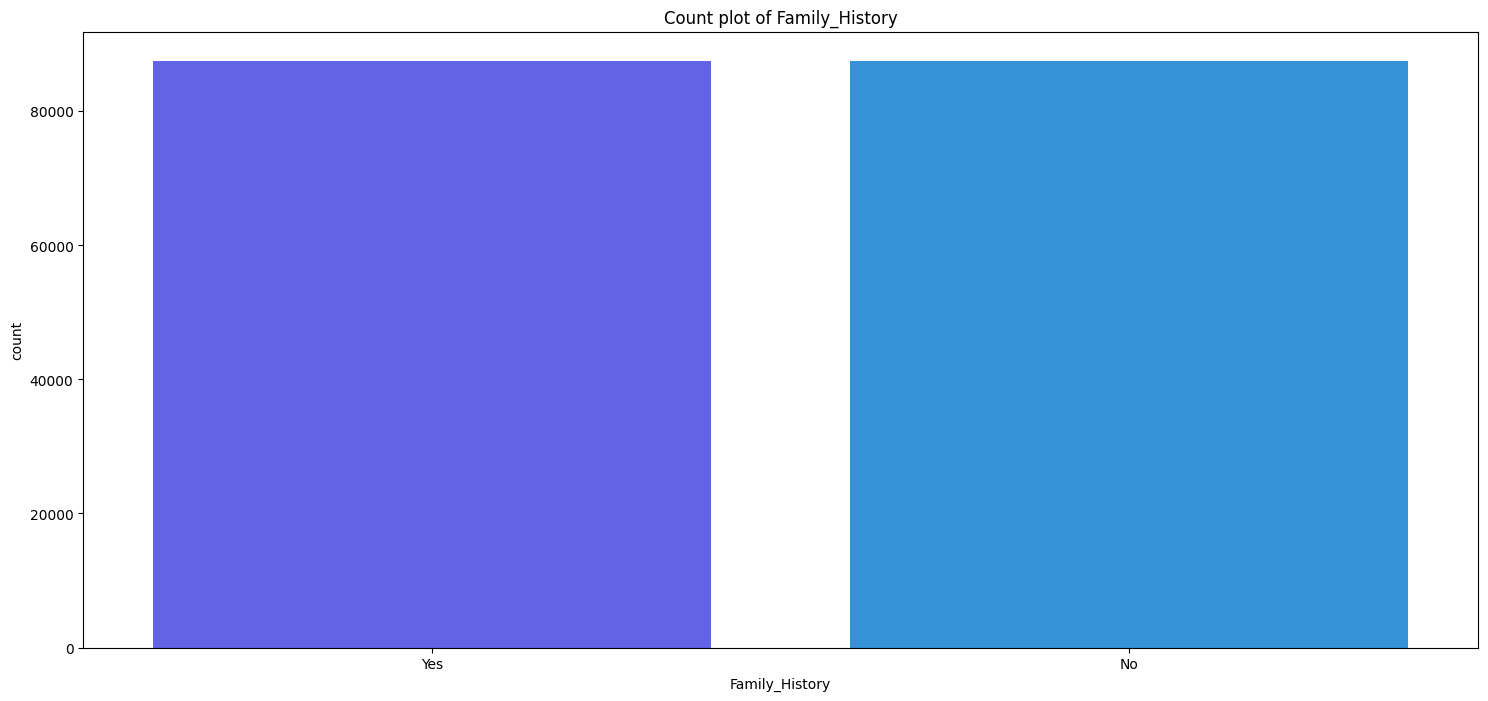

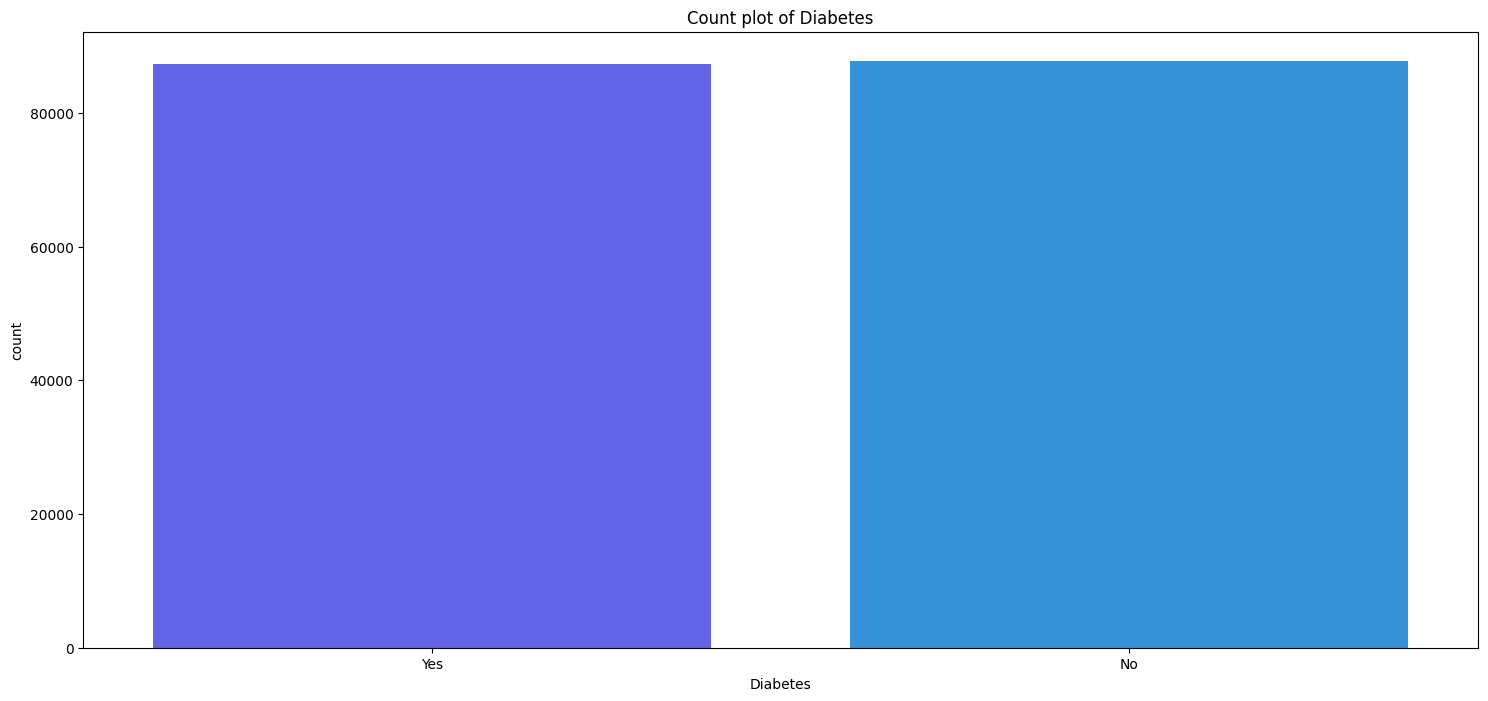

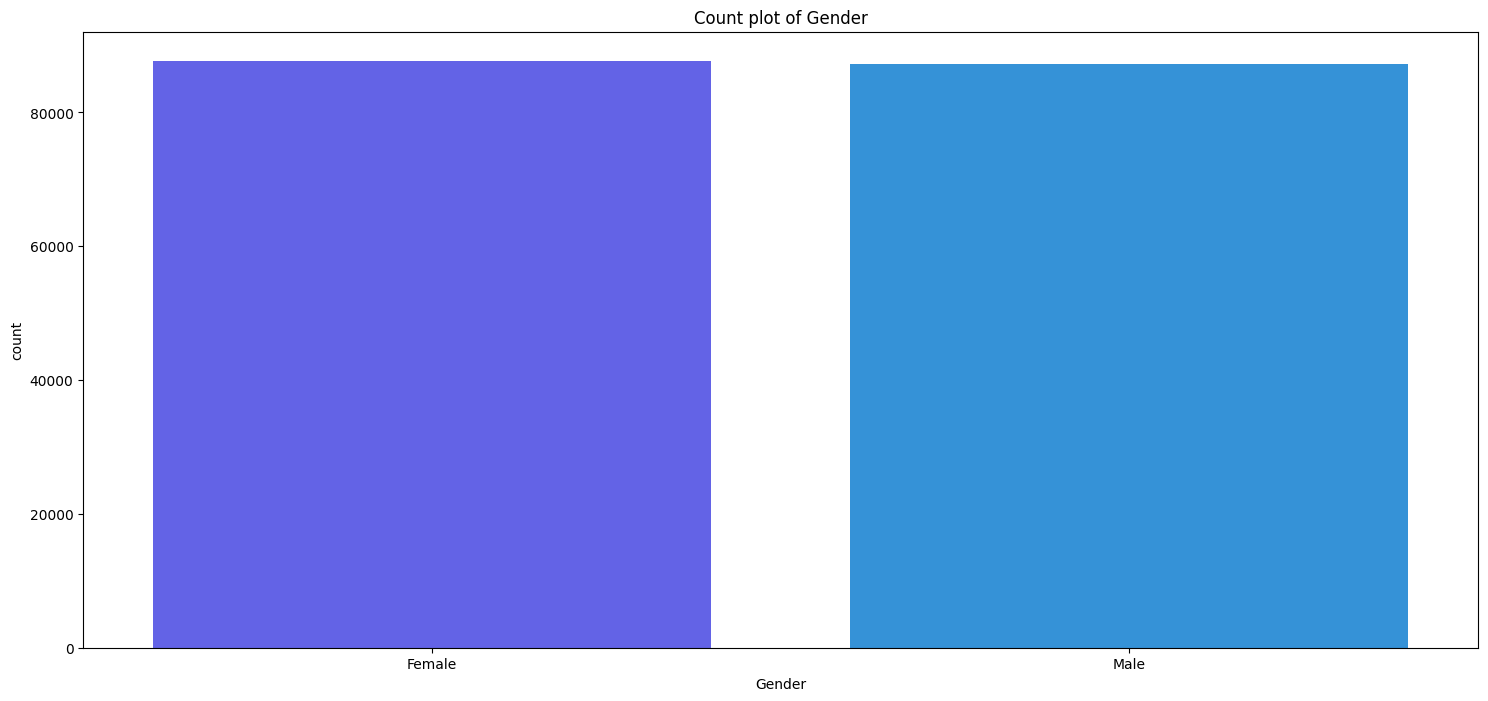

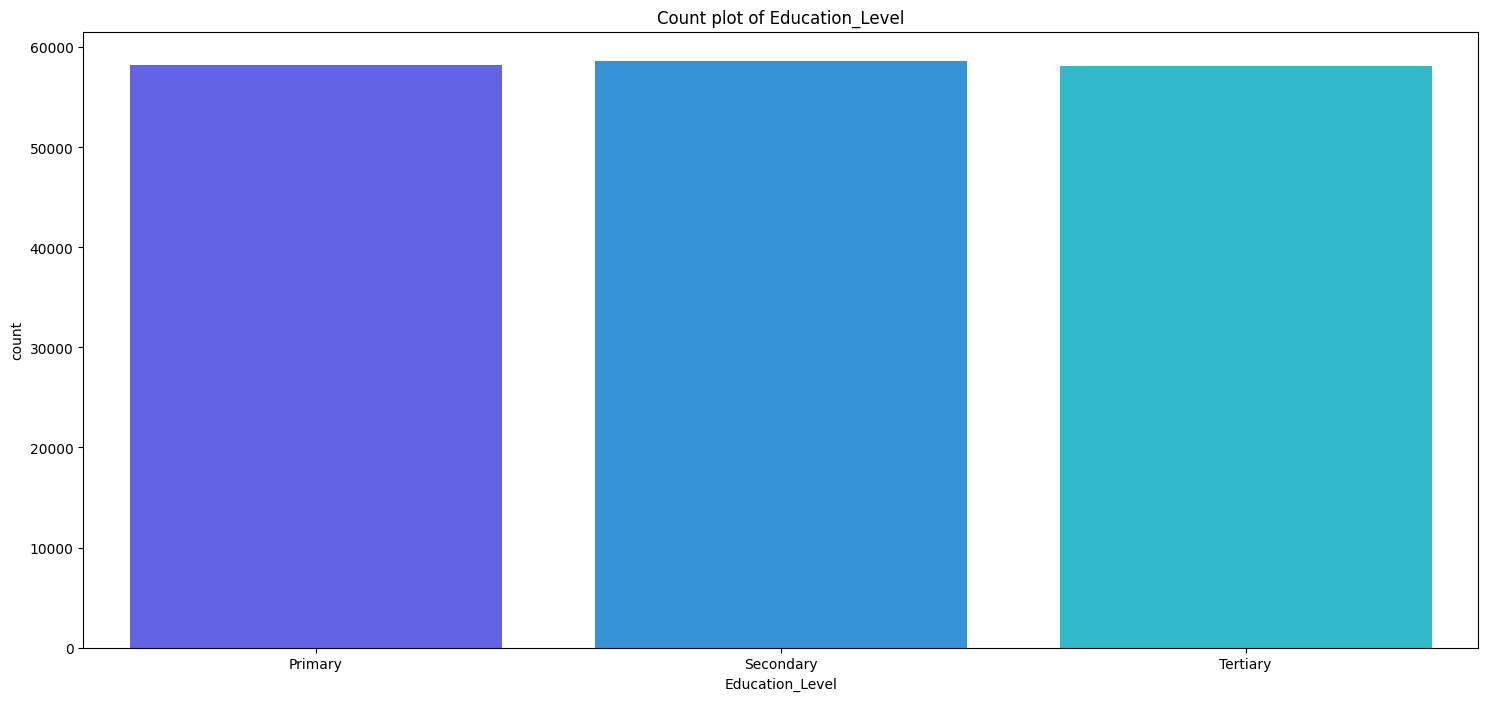

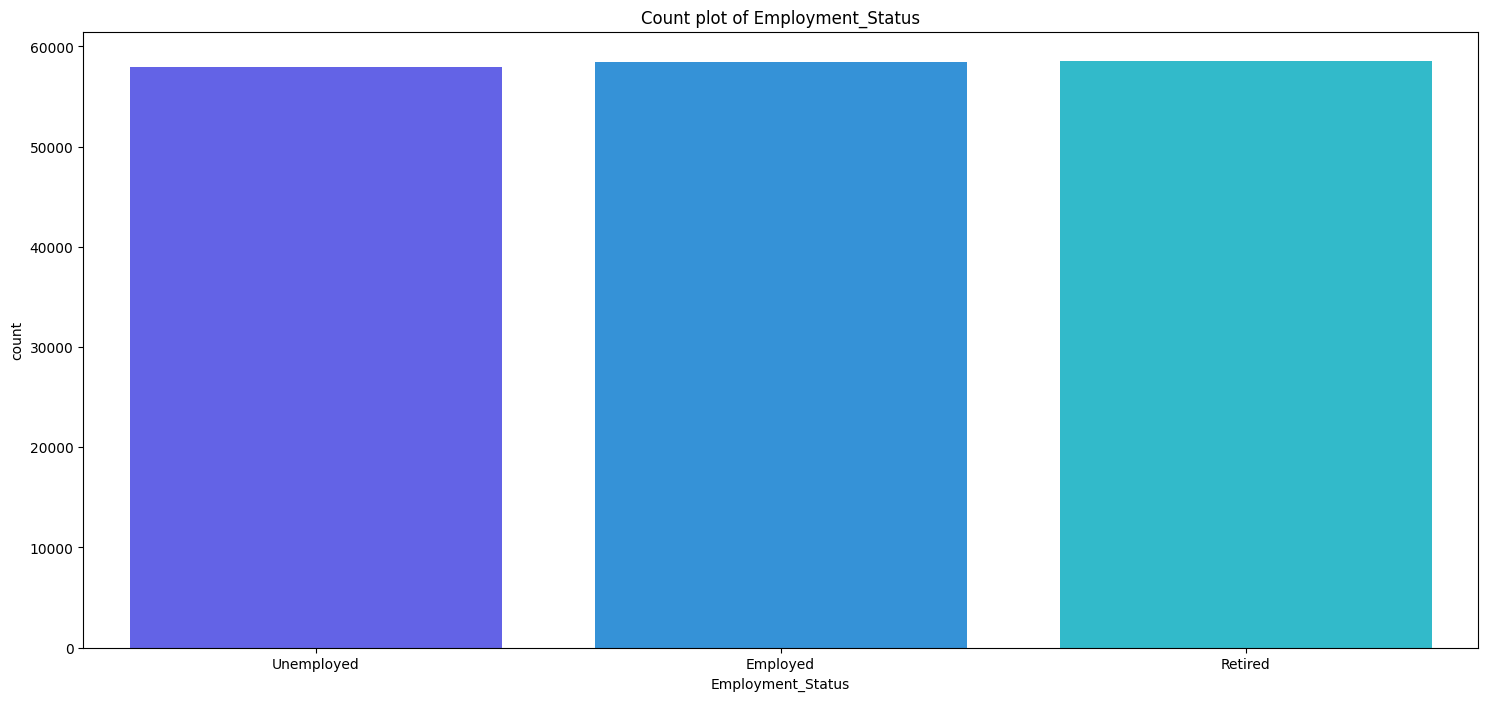

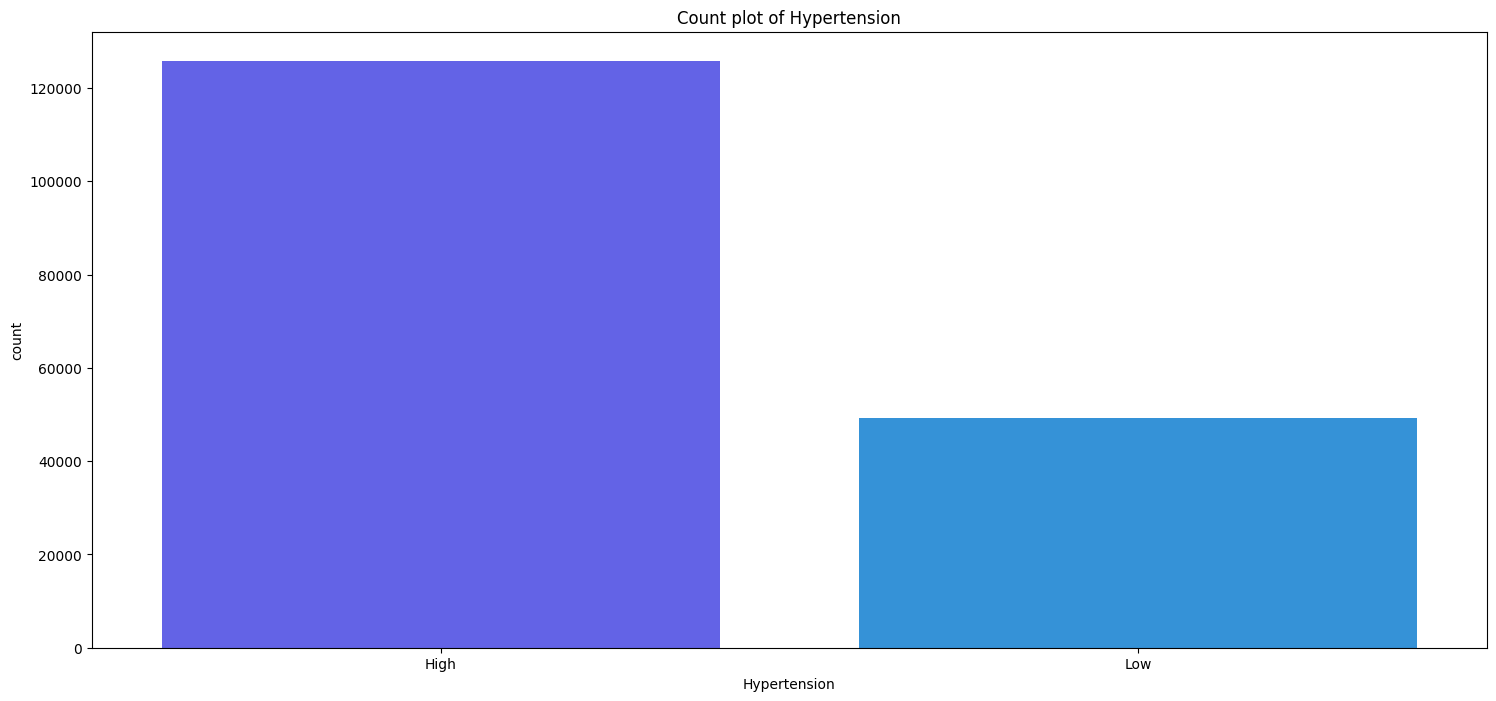

In [69]:
# Use Seaborn's "rainbow" color palette
rainbow_palette = sns.color_palette("rainbow", n_colors=len(df.select_dtypes(include=['object']).columns))

# Select categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(18, 8))
    sns.countplot(x=df[col], data=df, palette=rainbow_palette)  # Apply rainbow colors
    plt.title(f"Count plot of {col}")
    plt.xticks(rotation=0)  # Rotate x-axis labels if needed
    plt.show()
    print("\n")

Nature of categorical variables can be seen.

Relation between Hypertension and Gender
Gender        Female   Male
Hypertension               
High           63149  62632
Low            24526  24675




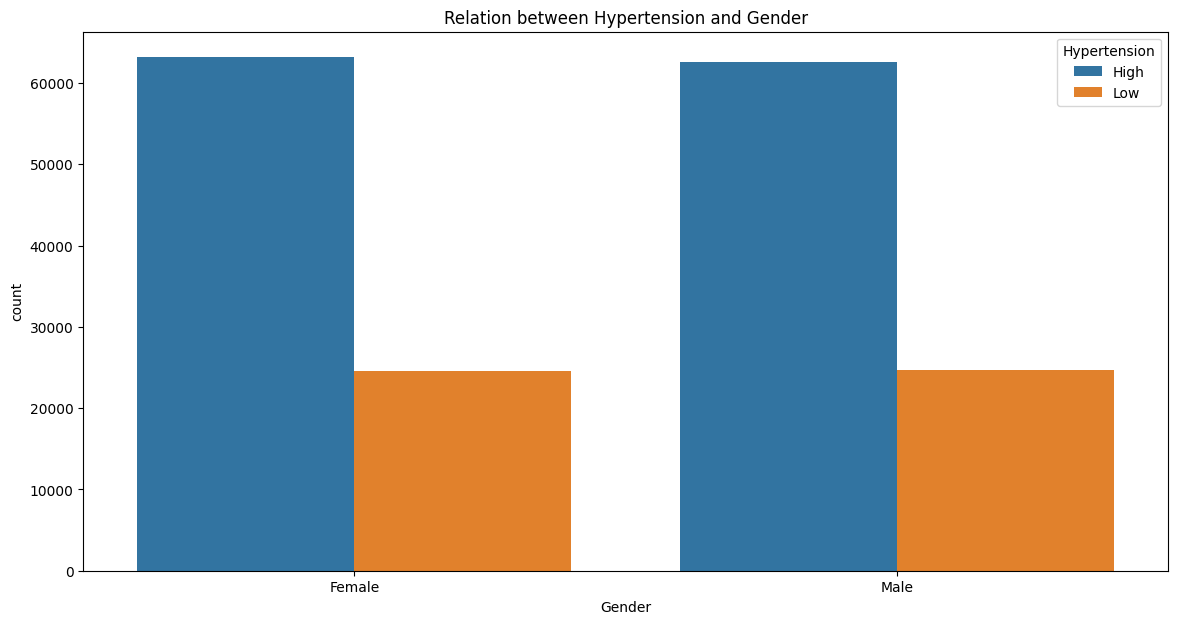


  

Relation between Hypertension and Diabetes
Diabetes         No    Yes
Hypertension              
High          63001  62780
Low           24737  24464




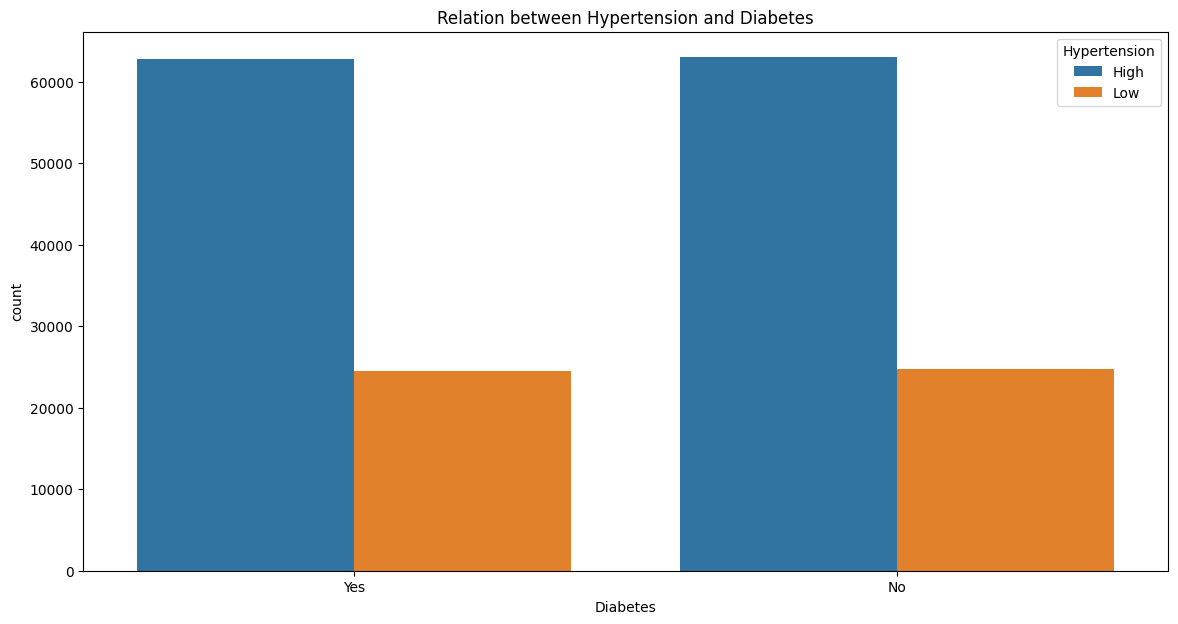


  

Relation between Hypertension and Family_History
Family_History     No    Yes
Hypertension                
High            62858  62923
Low             24633  24568




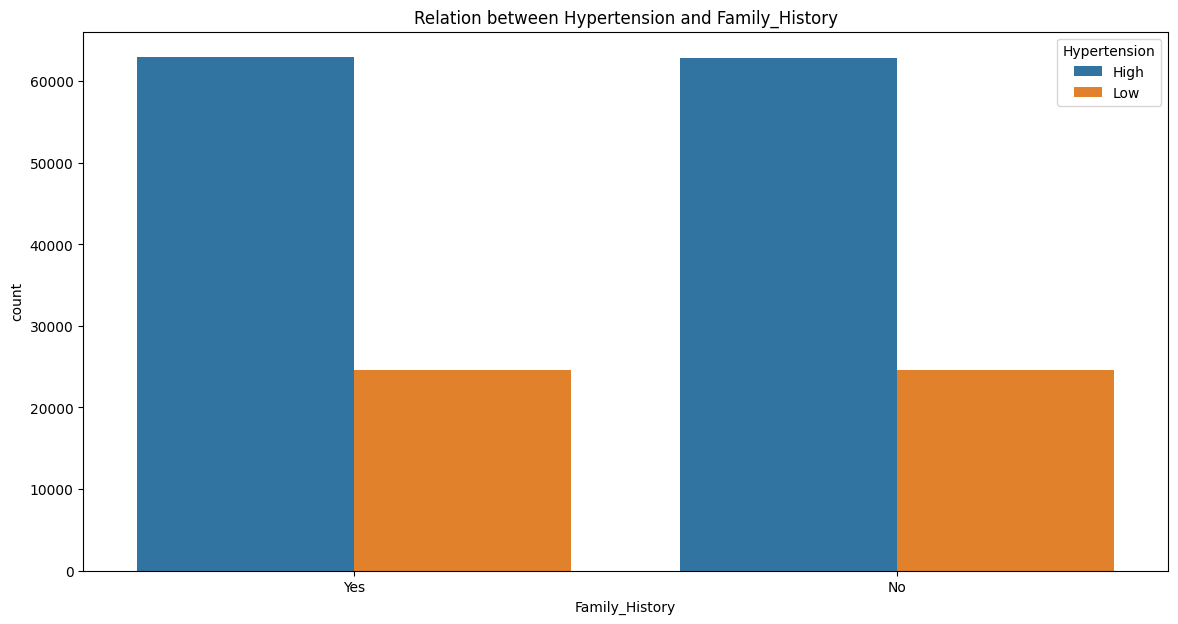


  

Relation between Hypertension and Physical_Activity_Level
Physical_Activity_Level   High    Low  Moderate
Hypertension                                   
High                     41895  41946     41940
Low                      16567  16346     16288




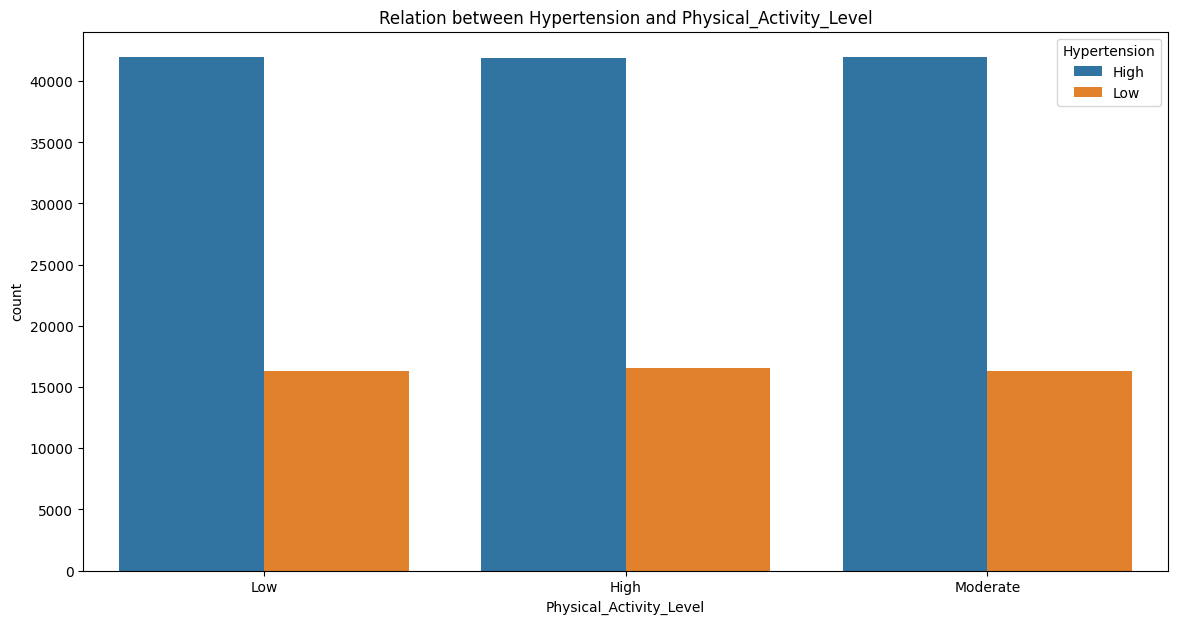


  

Relation between Hypertension and Smoking_Status
Smoking_Status  Current  Former  Never
Hypertension                          
High              42061   41992  41728
Low               16513   16521  16167




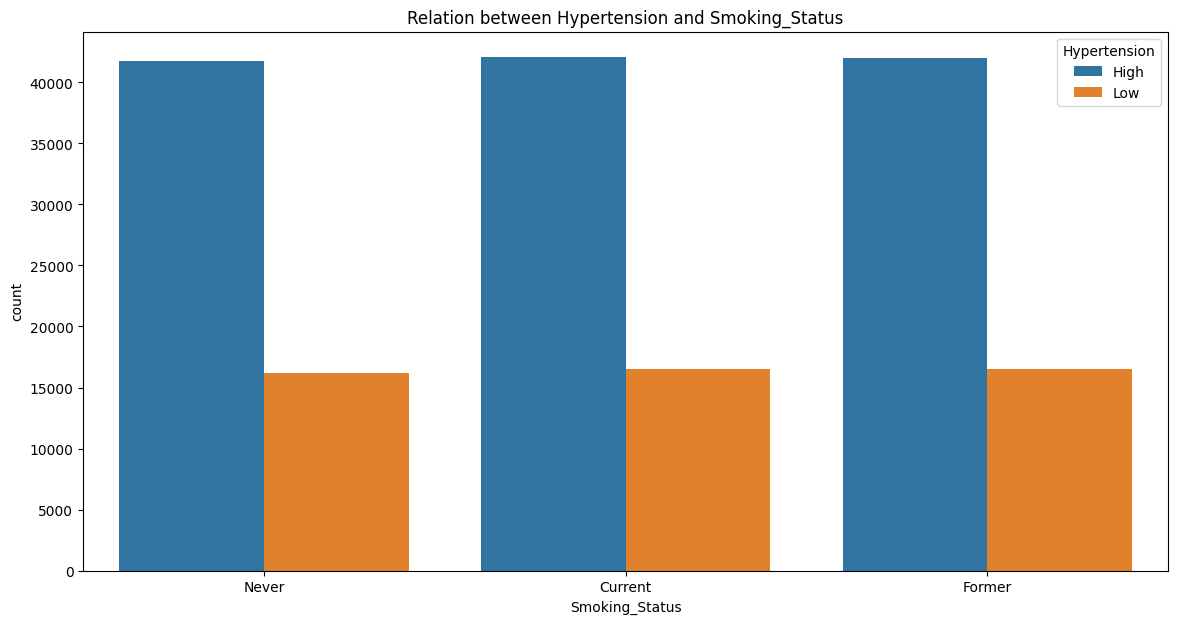


  

Relation between Hypertension and Employment_Status
Employment_Status  Employed  Retired  Unemployed
Hypertension                                    
High                  42168    42071       41542
Low                   16331    16488       16382




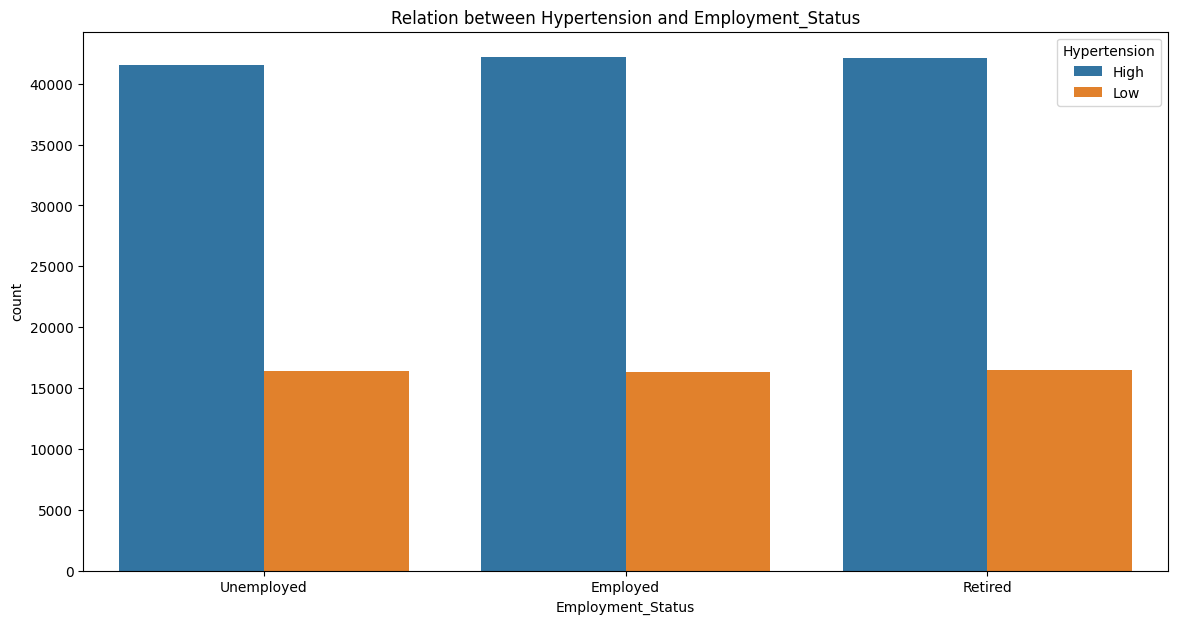


  

Relation between Hypertension and Country
Country       Argentina  Australia  Brazil  Canada  China  France  Germany  \
Hypertension                                                                 
High               6225       6253    6361    6203   6172    6276     6311   
Low                2548       2458    2422    2429   2413    2462     2432   

Country       India  Indonesia  Italy  Japan  Mexico  Russia  Saudi Arabia  \
Hypertension                                                                 
High           6286       6295   6340   6306    6230    6367          6414   
Low            2459       2428   2454   2437    2429    2490          2517   

Country       South Africa  South Korea  Spain  Turkey    UK   USA  
Hypertension                                                        
High                  6368         6293   6227    6293  6245  6316  
Low                   2467         2468   2474    2466  2467  2481  




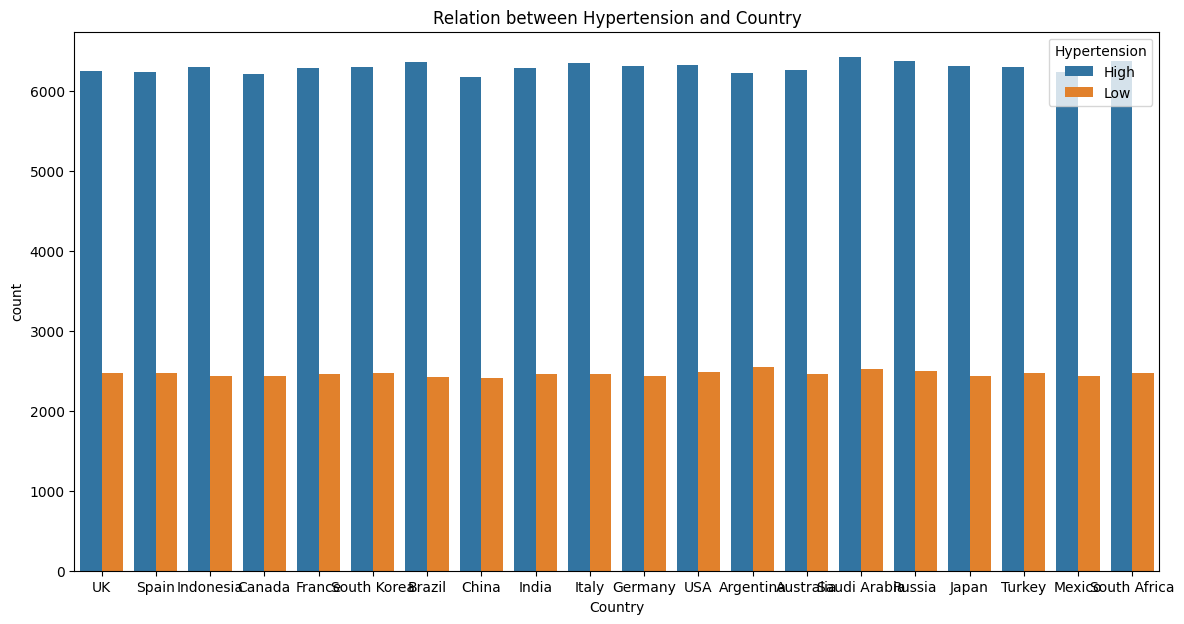

In [70]:
# Analyzing target variable -  hypertension with other features
pair_cols = ['Gender','Diabetes','Family_History','Physical_Activity_Level','Smoking_Status','Employment_Status','Country']
for col in pair_cols:
    print(f"Relation between Hypertension and {col}")
    # crosstab for analysis
    crstab = pd.crosstab(df['Hypertension'], df[col])
    print(crstab)
    print("\n")
    # plotting of feature with Hypertension
    plt.figure(figsize = (14,7))
    sns.countplot(df, x = col, hue = 'Hypertension')
    plt.title(f"Relation between Hypertension and {col}")
    plt.show()
    print("\n  \n")

Various insights can be drawn:

1. Active smoker have relative high hypertension.
2. Approximately 42k employed people have high hypertension and 16k have low hypertension.
3. Nothing much to do with family history.

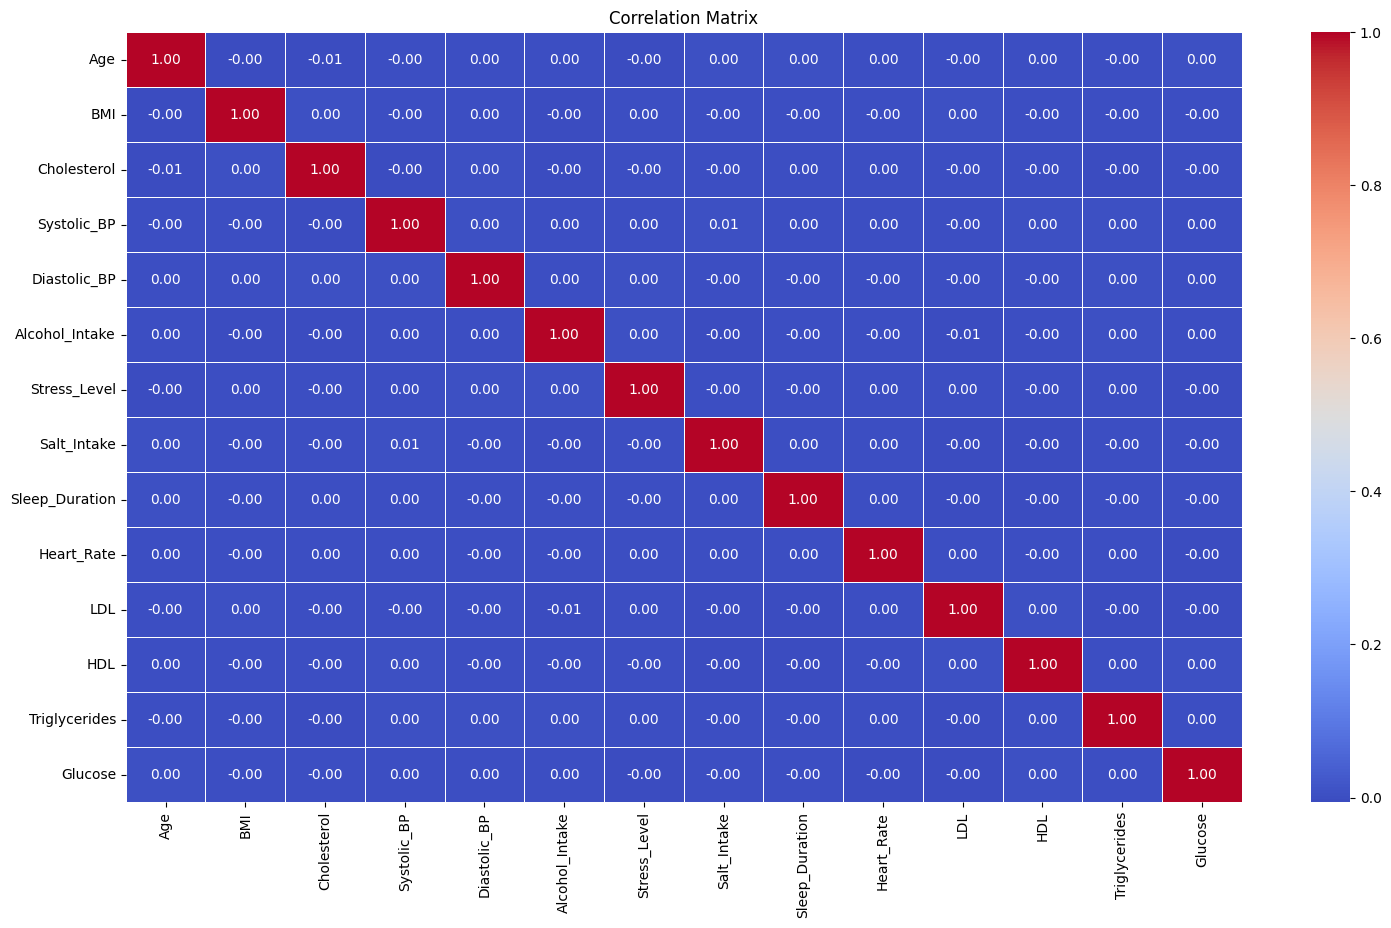

In [71]:
# Correlation Analysis of numerical features
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr_matrix, annot = True, fmt = '.2f', cmap = 'coolwarm', linewidth = 0.5)
plt.title("Correlation Matrix")
plt.show()

There is no much correlation among features.

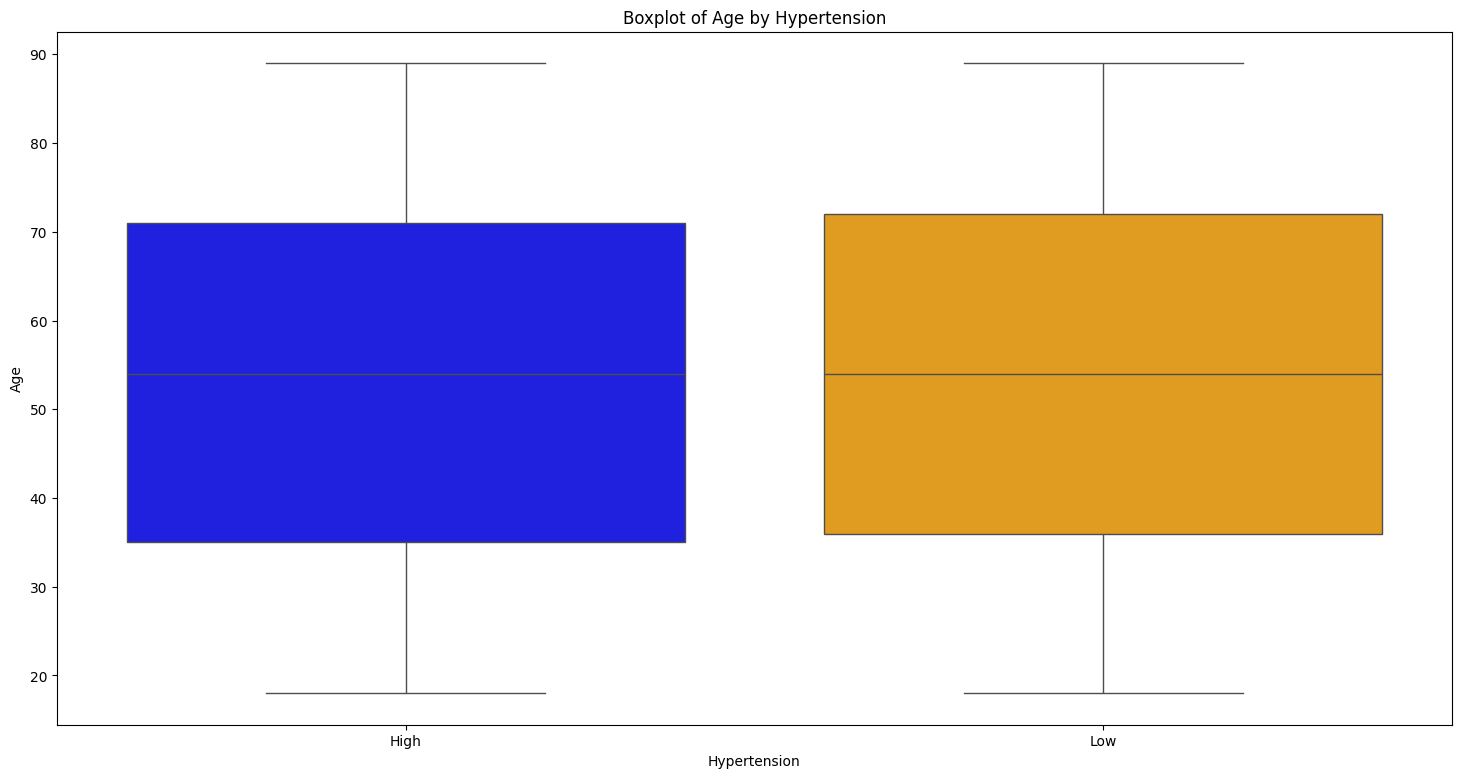

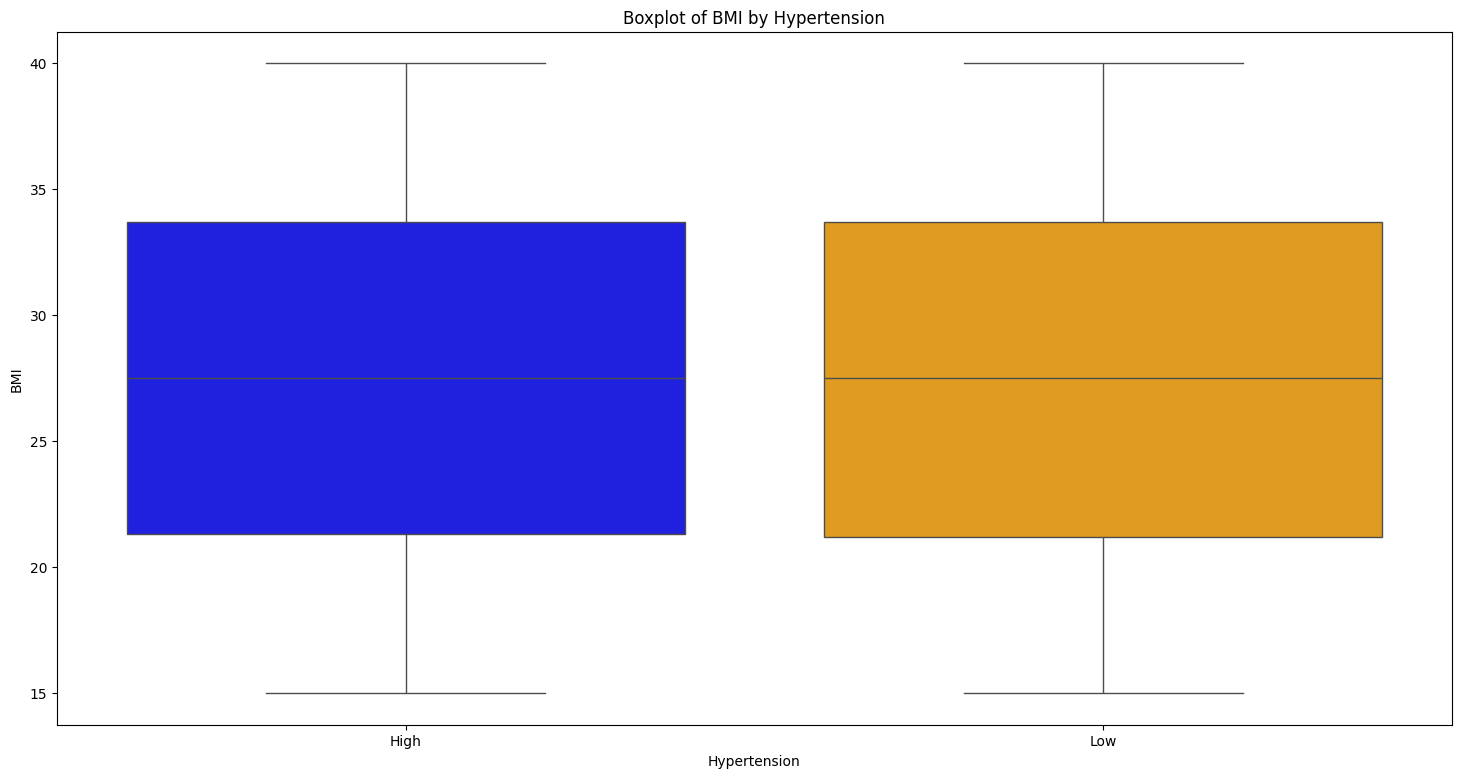

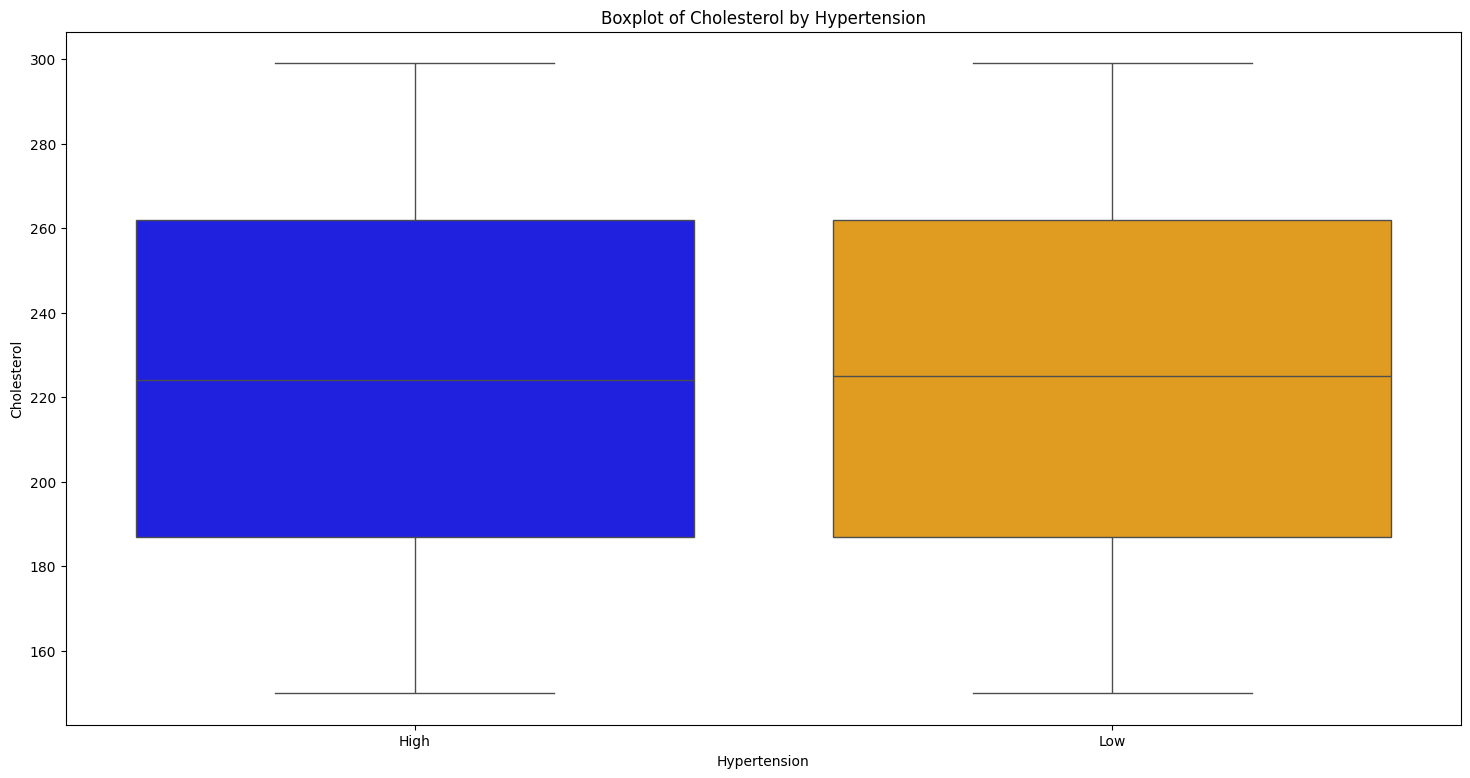

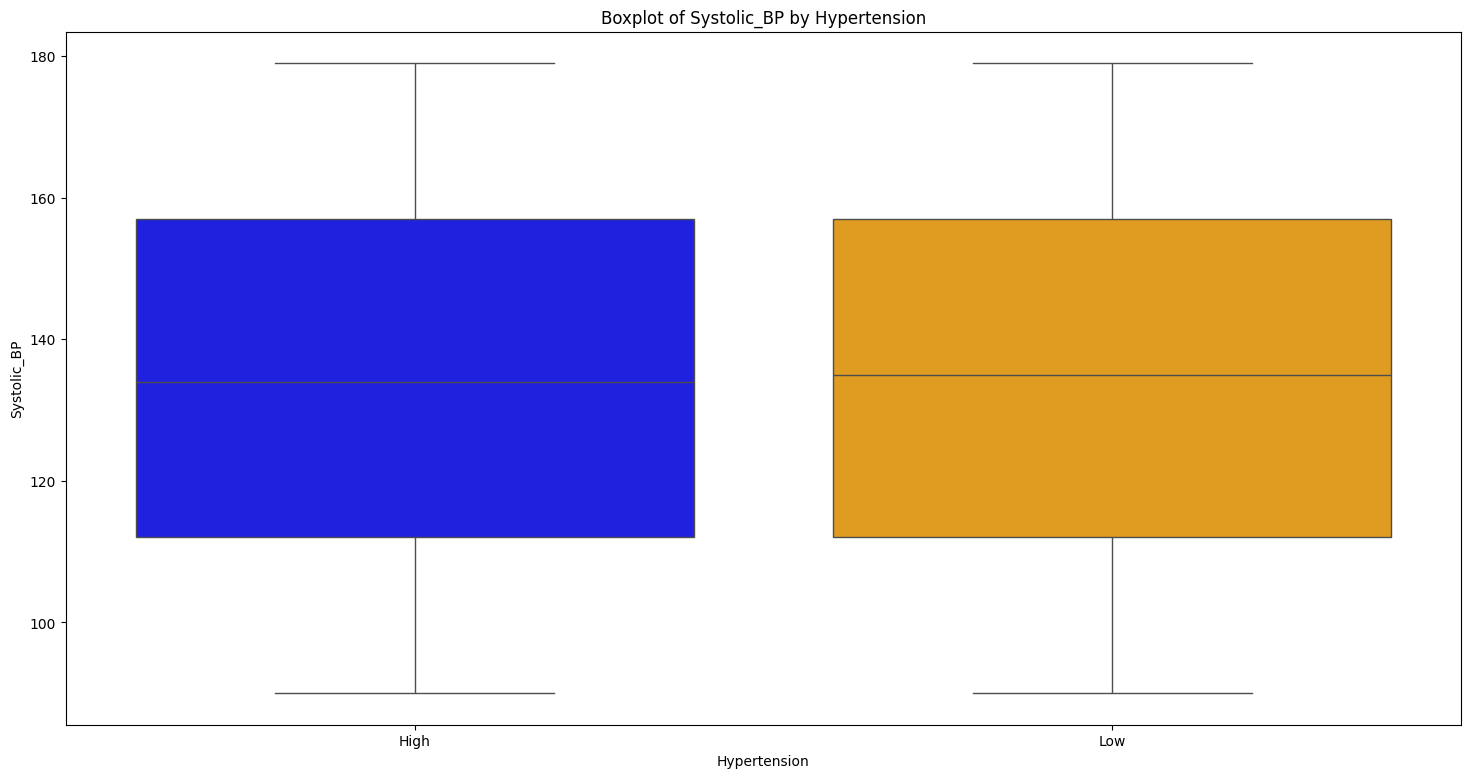

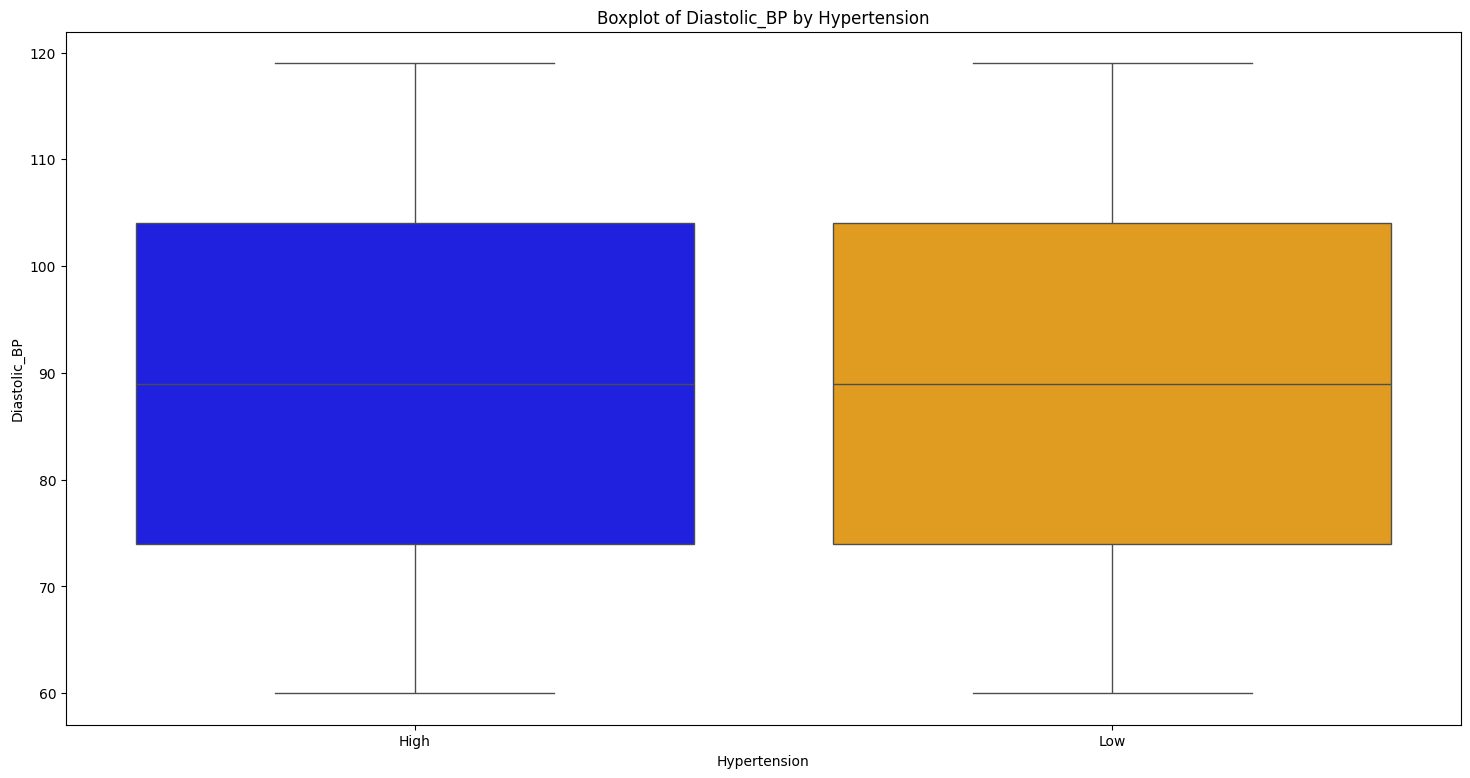

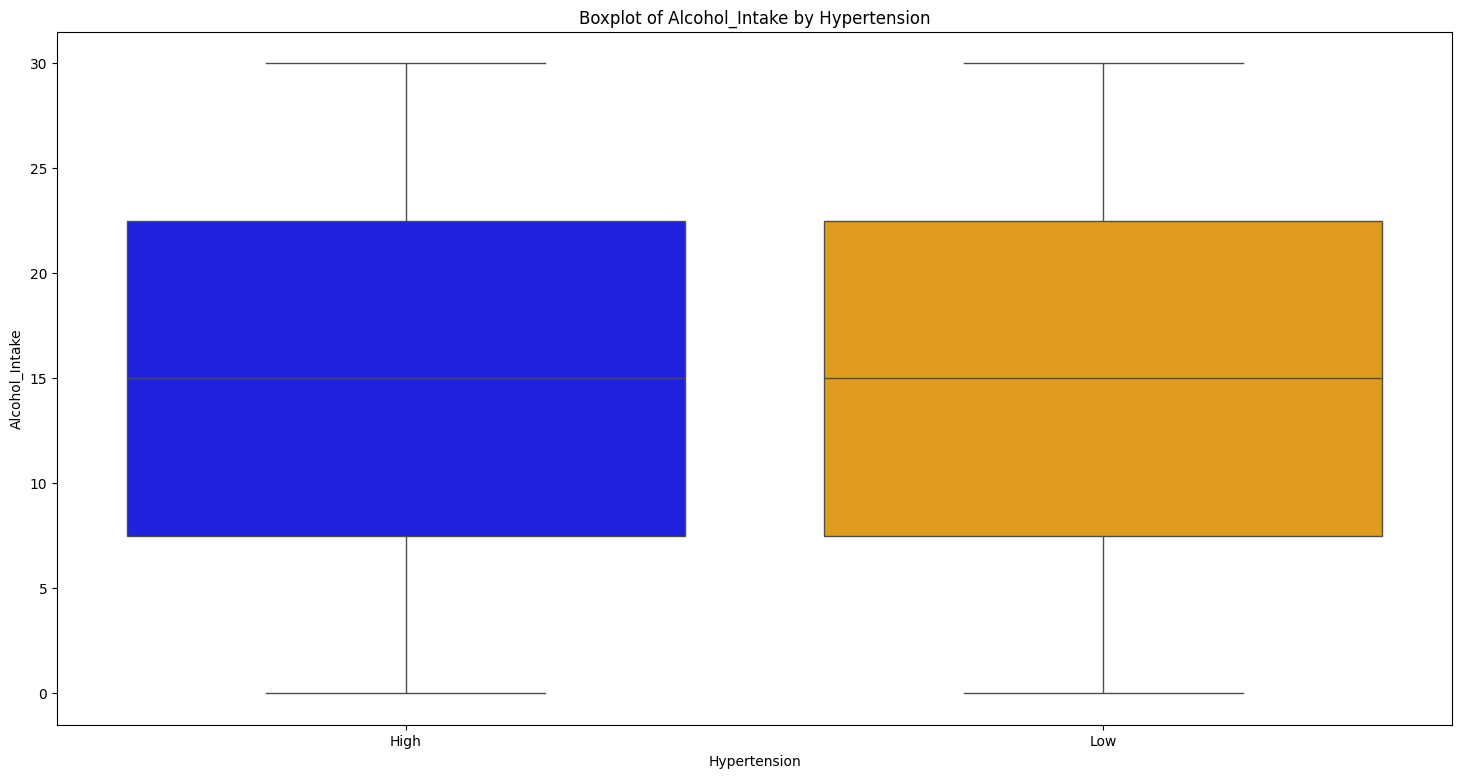

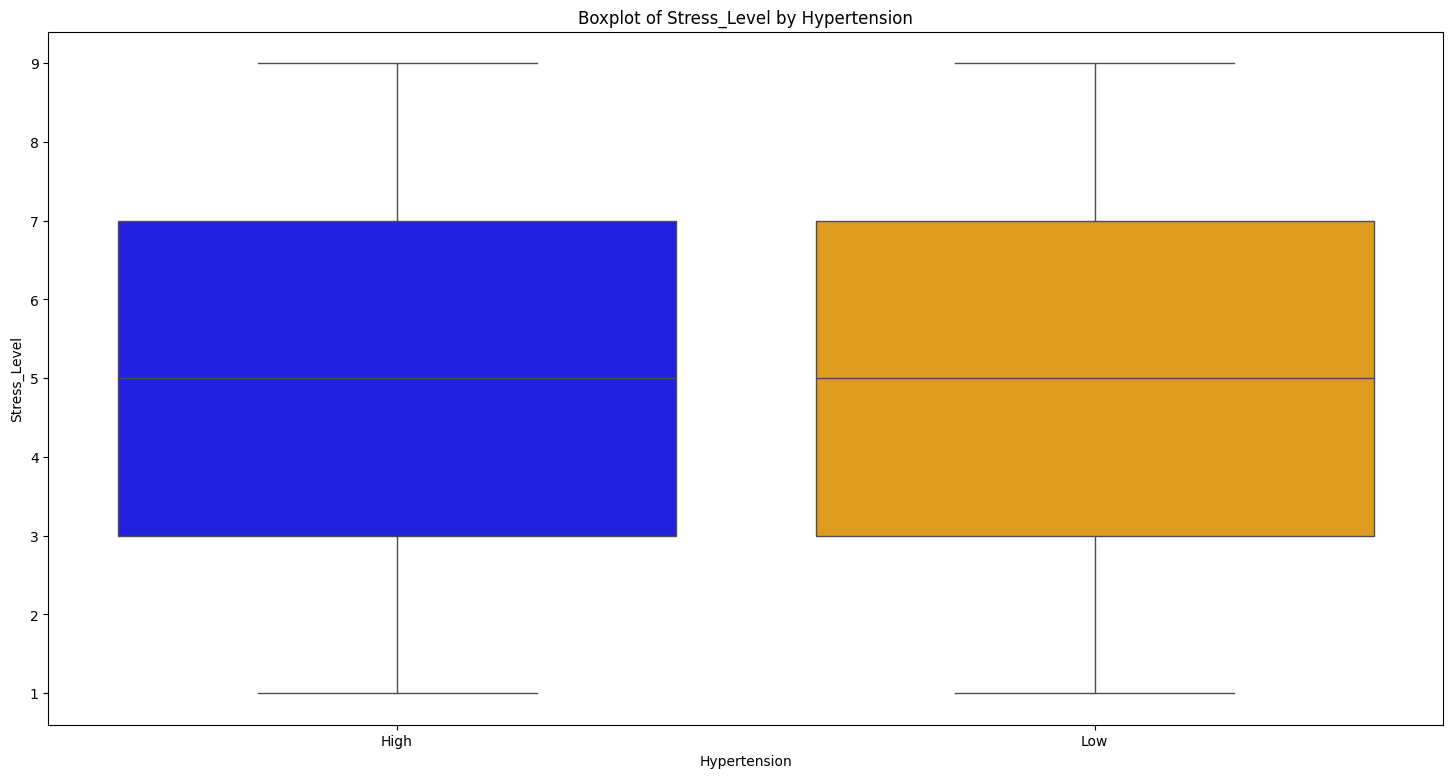

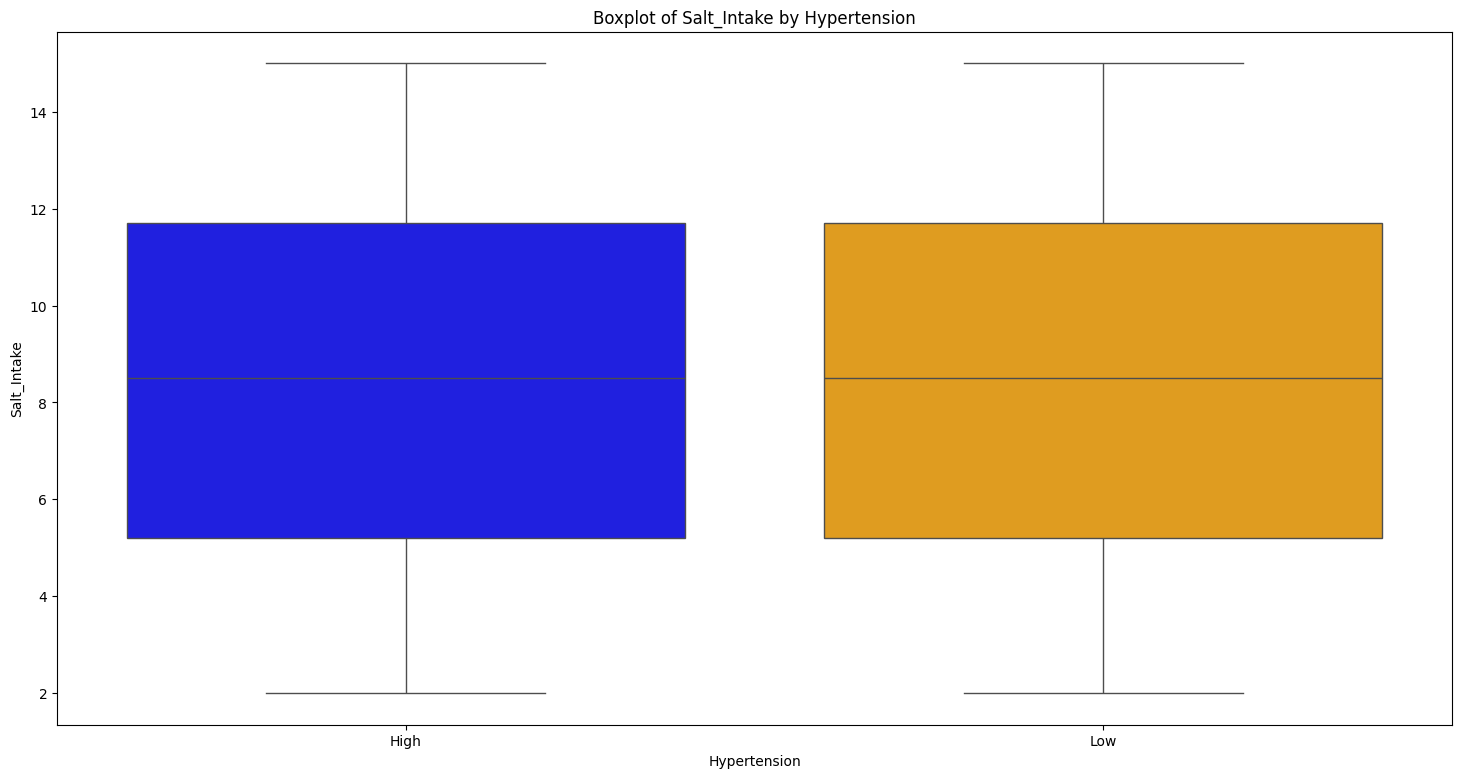

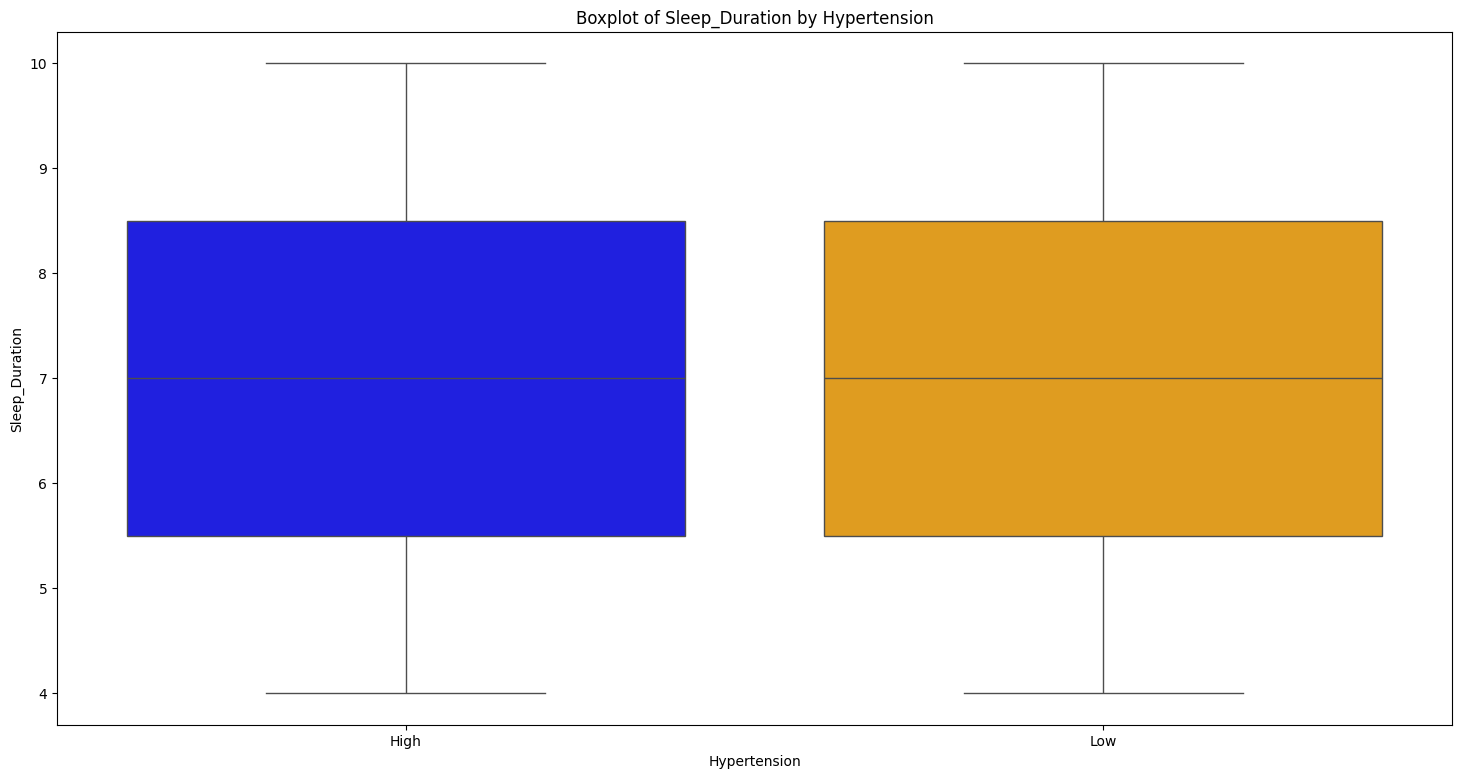

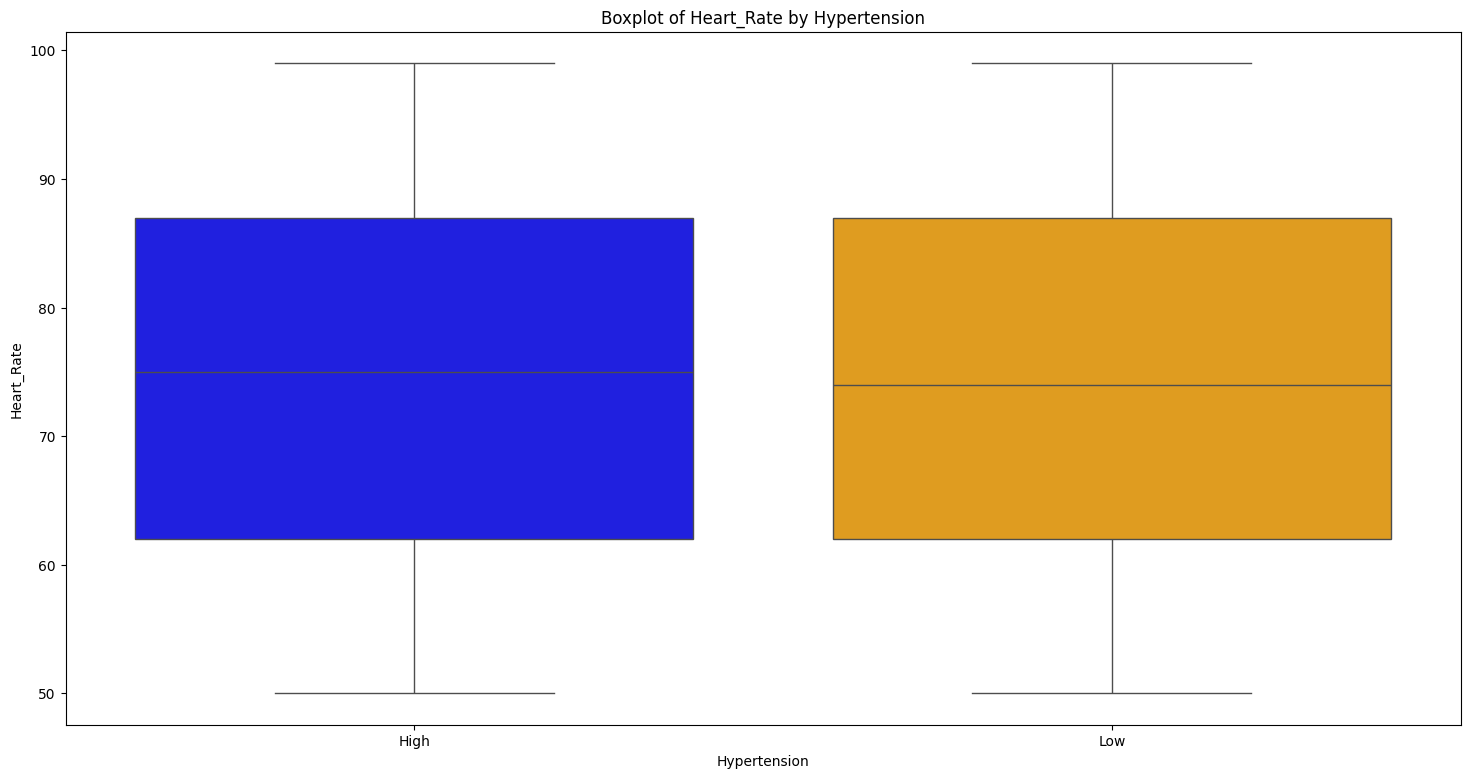

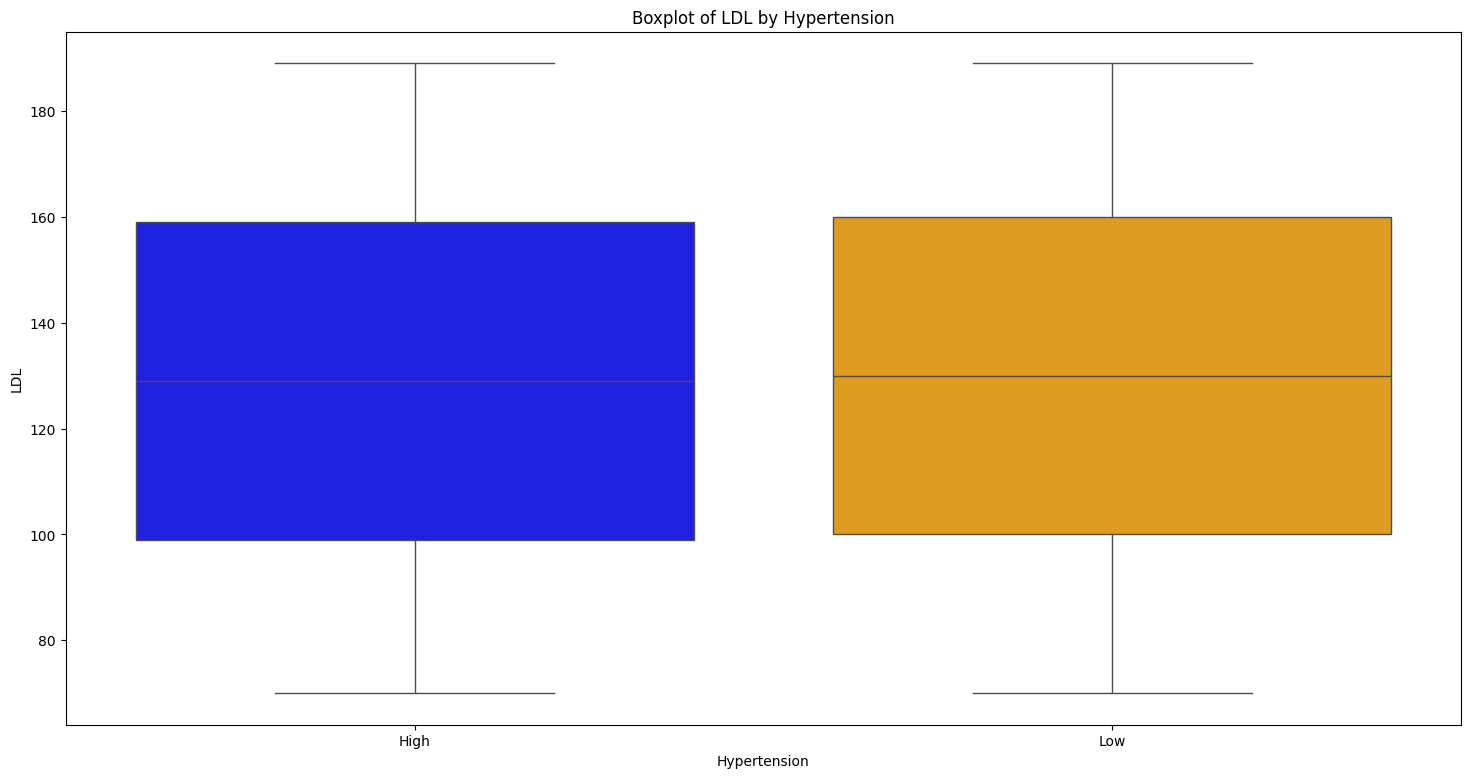

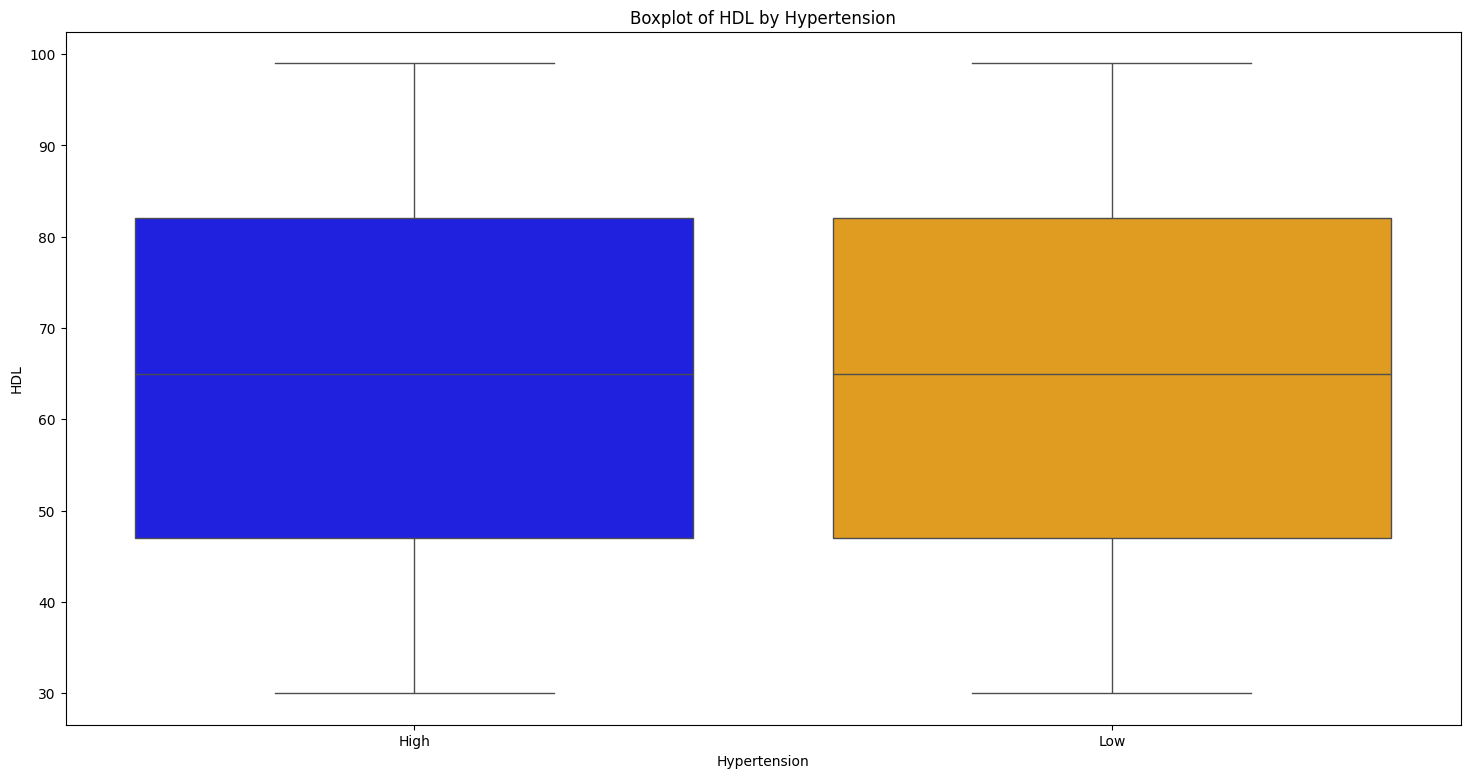

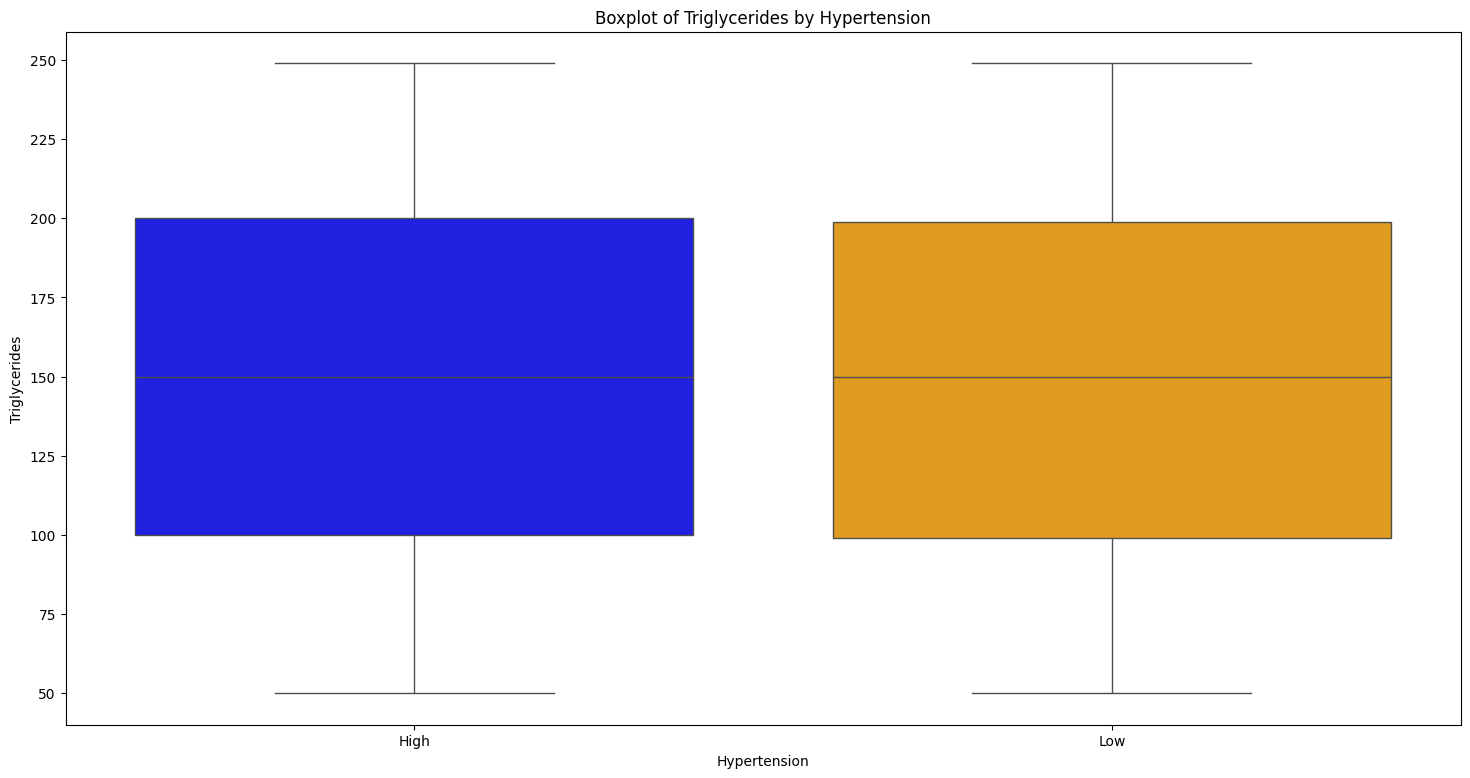

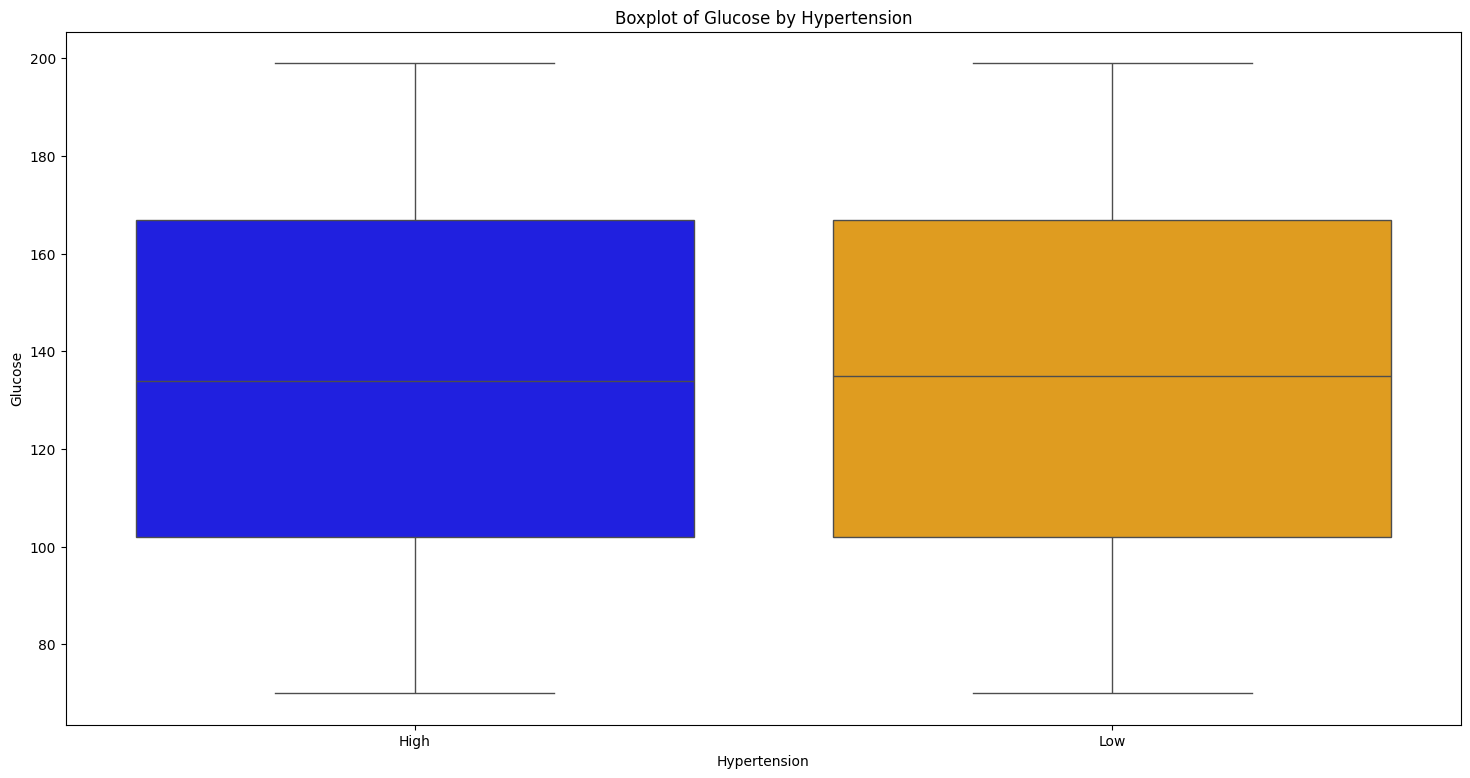

In [72]:
# Box plot for numerical features
custom_palette = {"Low": "orange", "High": "blue"}  # Adjusted to match actual values

for col in num_cols:
    plt.figure(figsize=(18, 9))
    sns.boxplot(data=df, x='Hypertension', y=col, palette=custom_palette)
    plt.title(f"Boxplot of {col} by Hypertension")
    plt.show()

## **Statistical Association (Chi-Square Test) Between Categorical Features and Hypertension**


In [73]:
# Chi square test to check significant association of categorical columns with Hypertension
# it will give p value
from scipy.stats import chi2_contingency

categorical_cols = ['Gender', 'Diabetes', 'Family_History', 'Physical_Activity_Level', 'Smoking_Status', 'Employment_Status', 'Country',
                   'Education_Level']

for col in categorical_cols:
    print(f"Chi-Square Test for {col}:")

    # Create the contingency table between the categorical column and 'Hypertension'
    contingency_table = pd.crosstab(df[col], df['Hypertension'])

    # Perform the chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    # Print the p-value for the test
    print(f"p-value: {p}")

    # You can also print the expected counts for each category
    print("Expected frequencies:")
    print(expected)

    # If the p-value is small (below 0.05), it suggests a statistically significant relationship
    if p < 0.05:
        print(f"Conclusion: There is a statistically significant relationship between {col} and Hypertension.")
    else:
        print(f"Conclusion: There is no statistically significant relationship between {col} and Hypertension.")

    print("\n")

Chi-Square Test for Gender:
p-value: 0.18115866332164007
Expected frequencies:
[[63022.76334137 24652.23665863]
 [62758.23665863 24548.76334137]]
Conclusion: There is no statistically significant relationship between Gender and Hypertension.


Chi-Square Test for Diabetes:
p-value: 0.47910393885294045
Expected frequencies:
[[63068.04915934 24669.95084066]
 [62712.95084066 24531.04915934]]
Conclusion: There is no statistically significant relationship between Diabetes and Hypertension.


Chi-Square Test for Family_History:
p-value: 0.7336186827828869
Expected frequencies:
[[62890.5 24600.5]
 [62890.5 24600.5]]
Conclusion: There is no statistically significant relationship between Family_History and Hypertension.


Chi-Square Test for Physical_Activity_Level:
p-value: 0.33678498320916034
Expected frequencies:
[[42023.801431   16438.198569  ]
 [41901.60160474 16390.39839526]
 [41855.59696426 16372.40303574]]
Conclusion: There is no statistically significant relationship between Physical_A

# **Feature Engineering**

In [74]:
# Map target
df['Hypertension'] = df['Hypertension'].map({'Low': 0, 'High': 1})

In [75]:
# Binary encoding
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Family_History'] = df['Family_History'].map({'Yes': 1, 'No': 0})
df['Diabetes'] = df['Diabetes'].map({'Yes': 1, 'No': 0})
df['Smoking_Status'] = df['Smoking_Status'].map({'Never': 0, 'Former': 1, 'Current': 2})
df['Physical_Activity_Level'] = df['Physical_Activity_Level'].map({'Low': 0, 'Medium': 1, 'High': 2})

In [76]:
# One-hot encoding
df = pd.get_dummies(df, columns=['Employment_Status', 'Country', 'Education_Level'], drop_first=True)

In [77]:
# Select features for model
features = ['Age', 'BMI', 'Systolic_BP', 'Smoking_Status', 'Physical_Activity_Level']
X_raw = df[features]
y = df['Hypertension']

In [78]:
# Keep a raw version for fitting distributions
X_for_distribution = X_raw.copy()

In [79]:
# Scale the data for ML models
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)

Non-linear relationships and interactions among features (e.g., Age * BMI) were not deeply explored in this version of the notebook. Future improvements could involve:
- Adding polynomial or interaction terms (e.g., Age^2, BMI*SBP)
- Using feature selection techniques to identify complex dependencies
- Testing feature importance using SHAP or permutation methods

This would further improve the predictive performance and allow better uncertainty modeling through Monte Carlo Simulation.

# **Clarifying Monte Carlo Simulation**

Monte Carlo Simulation (MCS) is not a predictive model. Instead, it is a tool for uncertainty quantification. It works by generating thousands of synthetic patient profiles based on probability distributions fitted to real-world data. These simulations are used to assess the variability and confidence intervals around the predictions made by a statistical or machine learning model (e.g., Logistic Regression).

In this notebook, we use Logistic Regression to predict hypertension risk, and Monte Carlo to simulate uncertainty around those predictions using fitted probability distributions (Log-normal for Age, Gamma for BMI, Weibull for Systolic BP, etc.).

In [81]:
# Example: Simulating 10,000 synthetic patients
num_simulations = 10000
sim_data = pd.DataFrame()

# Fit real distributions from the dataset
age_mu, age_sigma = norm.fit(df['Age'])
bmi_shape, bmi_loc, bmi_scale = lognorm.fit(df['BMI'])
sbp_shape, sbp_loc, sbp_scale = gamma.fit(df['Systolic_BP'])  # Assuming gamma for Systolic BP

# Simulate numerical features
sim_data['Age'] = np.random.normal(loc=age_mu, scale=age_sigma, size=num_simulations)
sim_data['BMI'] = lognorm.rvs(bmi_shape, loc=bmi_loc, scale=bmi_scale, size=num_simulations)
sim_data['Systolic_BP'] = gamma.rvs(sbp_shape, loc=sbp_loc, scale=sbp_scale, size=num_simulations)

# Simulate categorical features

# 1. Smoking_Status (multiclass: 0=Never, 1=Former, 2=Current)
smoking_dist = df['Smoking_Status'].dropna().value_counts(normalize=True).sort_index()
smoking_probs = smoking_dist.values / smoking_dist.values.sum()

sim_data['Smoking_Status'] = np.random.choice(
    smoking_dist.index,
    size=num_simulations,
    p=smoking_probs
)

# 2. Physical_Activity_Level (categorical)
activity_dist = df['Physical_Activity_Level'].dropna().value_counts(normalize=True).sort_index()
activity_probs = activity_dist.values / activity_dist.values.sum()

sim_data['Physical_Activity_Level'] = np.random.choice(
    activity_dist.index,
    size=num_simulations,
    p=activity_probs
)

# Predict hypertension risk using the trained model
features = ['Age', 'BMI', 'Systolic_BP', 'Smoking_Status', 'Physical_Activity_Level']
sim_data['Hypertension_Risk'] = model.predict_proba(sim_data[features])[:, 1]

### Why Monte Carlo is Not a Predictive Model

Monte Carlo Simulation (MCS) is not a classifier or regression model. It does not learn patterns from data to predict outcomes like Logistic Regression or XGBoost. Instead, it helps us understand **uncertainty** in predictions by simulating thousands of possible patient profiles based on fitted distributions.

By accounting for randomness in:
- **Blood pressure variability** (daily fluctuations),
- **Medication adherence** (inconsistently taking meds),
- **Lifestyle changes** (like sudden physical activity),

Monte Carlo Simulation allows us to see **how robust or uncertain** a model’s prediction might be. This helps clinicians understand the confidence in each risk estimate.

> ⚠️ Note: Evaluation of Monte Carlo results should rely on **distribution-based metrics**, not classifier metrics like ROC-AUC.

### Monte Carlo Simulation as Uncertainty Quantification Tool

Monte Carlo Simulation (MCS) is not a predictive model. Unlike classifiers such as Logistic Regression or XGBoost, MCS is used to **simulate a range of possible outcomes** and estimate uncertainty based on probability distributions of input features (e.g., blood pressure, age, BMI).

In this study:
- We use Logistic Regression / XGBoost to **predict hypertension risk**.
- Then, we apply Monte Carlo Simulation to **quantify the uncertainty** of predictions by generating thousands of patient profiles based on fitted distributions.


# **Distribution Fitting**


--- Distribution Fitting for Age ---


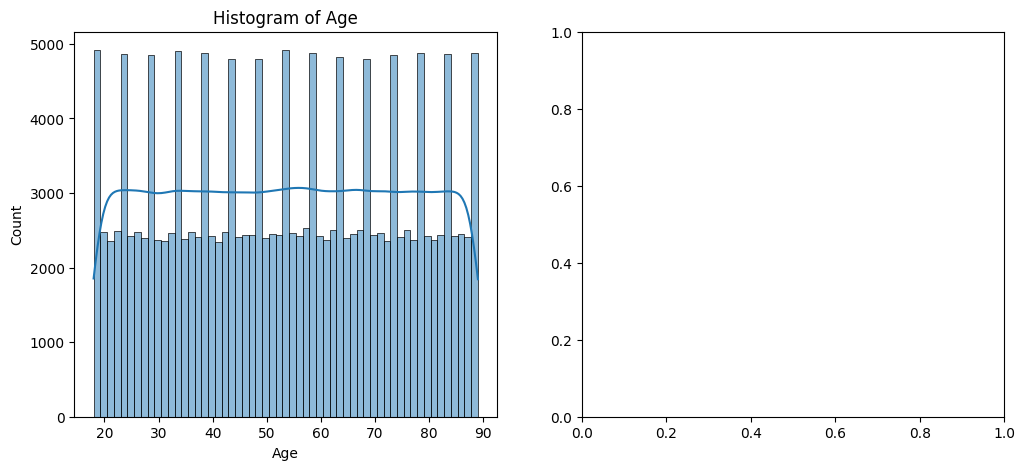

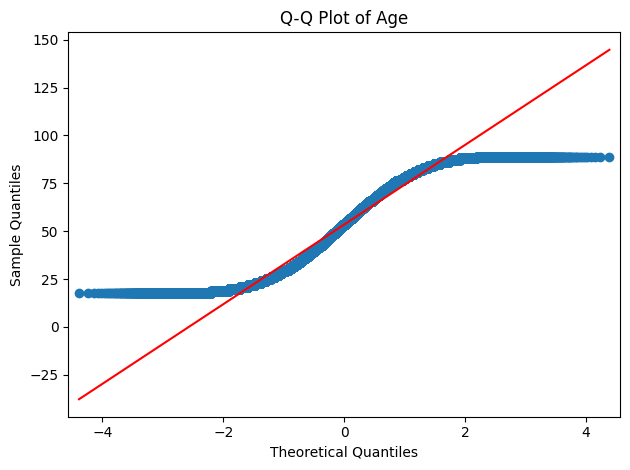

Could not fit Normal on Age: module 'scipy.stats.distributions' has no attribute 'normal'
Could not fit Log-normal on Age: module 'scipy.stats.distributions' has no attribute 'log-normal'
Could not fit Weibull on Age: module 'scipy.stats.distributions' has no attribute 'weibull'
K-S test results for Age:
Gamma: KS=0.0642, p=0.0000

--- Distribution Fitting for BMI ---


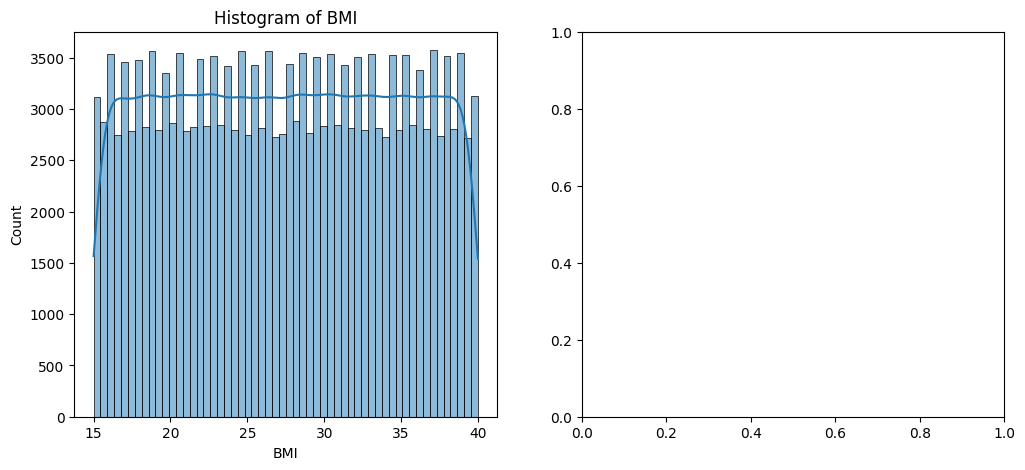

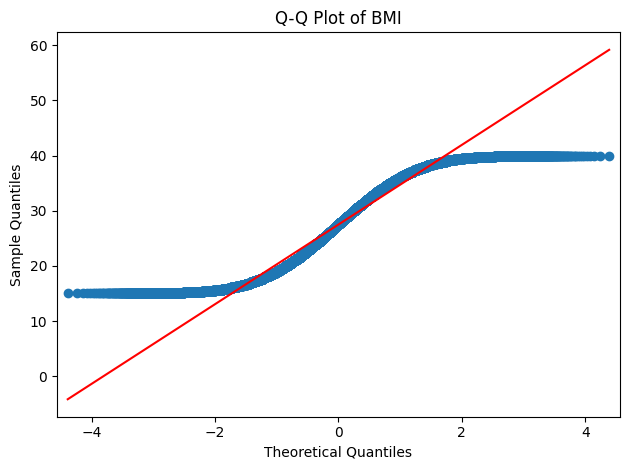

Could not fit Normal on BMI: module 'scipy.stats.distributions' has no attribute 'normal'
Could not fit Log-normal on BMI: module 'scipy.stats.distributions' has no attribute 'log-normal'
Could not fit Weibull on BMI: module 'scipy.stats.distributions' has no attribute 'weibull'
K-S test results for BMI:
Gamma: KS=0.0594, p=0.0000

--- Distribution Fitting for Systolic_BP ---


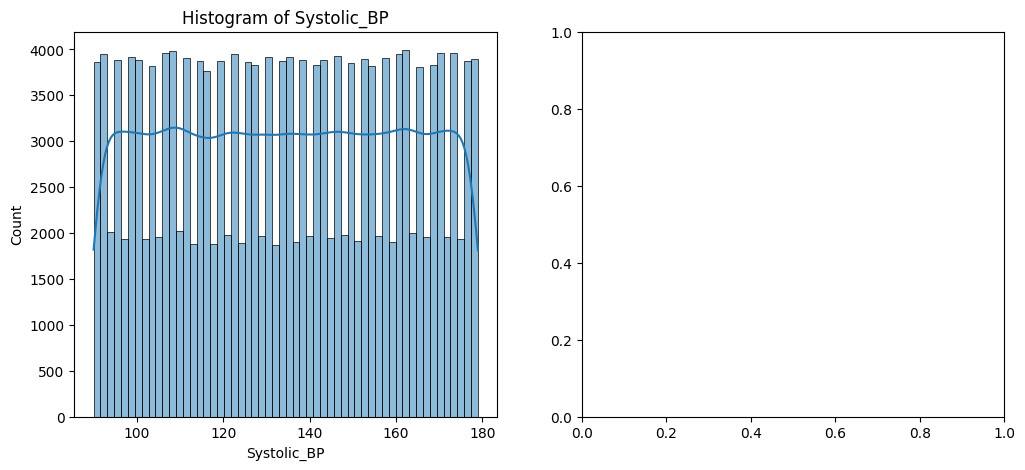

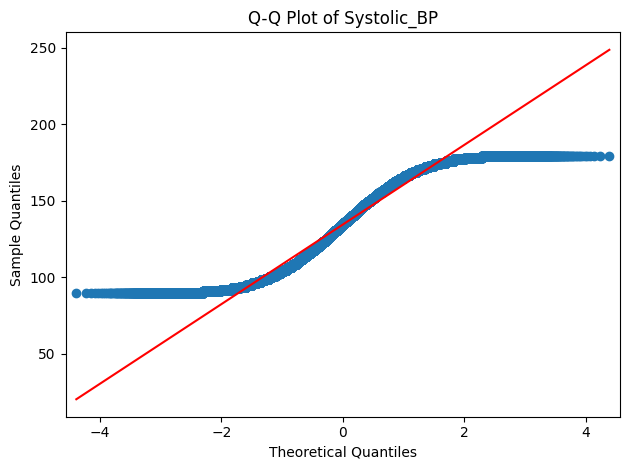

Could not fit Normal on Systolic_BP: module 'scipy.stats.distributions' has no attribute 'normal'
Could not fit Log-normal on Systolic_BP: module 'scipy.stats.distributions' has no attribute 'log-normal'
Could not fit Weibull on Systolic_BP: module 'scipy.stats.distributions' has no attribute 'weibull'
K-S test results for Systolic_BP:
Gamma: KS=0.0638, p=0.0000


In [82]:
from scipy.stats import norm, lognorm, gamma, weibull_min, kstest
import statsmodels.api as sm

# Numerical features to test
numeric_features = ['Age', 'BMI', 'Systolic_BP']

for feature_name in numeric_features:
    print(f"\n--- Distribution Fitting for {feature_name} ---")
    feature = df[feature_name].dropna()

    # Histogram and Q-Q plot
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(feature, kde=True)
    plt.title(f"Histogram of {feature_name}")

    plt.subplot(1, 2, 2)
    sm.qqplot(feature, line='s')
    plt.title(f"Q-Q Plot of {feature_name}")
    plt.tight_layout()
    plt.show()

    # Fit and test distributions
    dist_results = {}
    for dist_name, dist in [('Normal', norm), ('Log-normal', lognorm), ('Gamma', gamma), ('Weibull', weibull_min)]:
        try:
            params = dist.fit(feature)
            ks_stat, p_value = kstest(feature, dist_name.lower(), args=params)
            dist_results[dist_name] = (ks_stat, p_value)
        except Exception as e:
            print(f"Could not fit {dist_name} on {feature_name}: {e}")

    print(f"K-S test results for {feature_name}:")
    for dist, (ks, p) in dist_results.items():
        print(f"{dist}: KS={ks:.4f}, p={p:.4f}")

In [83]:
age_params = lognorm.fit(X_for_distribution['Age'], floc=0)
bmi_params = gamma.fit(X_for_distribution['BMI'])
sbp_params = weibull_min.fit(X_for_distribution['Systolic_BP'], floc=0)

# **Monte Carlo Simulation**

In [86]:
# Monte Carlo Simulation with selected features
num_simulations = 10000
sim_data = pd.DataFrame()

# Fit real distributions
age_mu, age_sigma = norm.fit(df['Age'])
bmi_shape, bmi_loc, bmi_scale = lognorm.fit(df['BMI'])
sbp_shape, sbp_loc, sbp_scale = gamma.fit(df['Systolic_BP'])

# Simulate numerical features
sim_data['Age'] = np.random.normal(loc=age_mu, scale=age_sigma, size=num_simulations)
sim_data['BMI'] = lognorm.rvs(bmi_shape, loc=bmi_loc, scale=bmi_scale, size=num_simulations)
sim_data['Systolic_BP'] = gamma.rvs(sbp_shape, loc=sbp_loc, scale=sbp_scale, size=num_simulations)

# Simulate categorical features

# Smoking_Status as multiclass (0=Never, 1=Former, 2=Current)
smoking_dist = df['Smoking_Status'].dropna().value_counts(normalize=True).sort_index()
smoking_probs = smoking_dist.values
smoking_levels = smoking_dist.index

sim_data['Smoking_Status'] = np.random.choice(
    smoking_levels,
    size=num_simulations,
    p=smoking_probs
)

# Physical_Activity_Level (categorical simulation)
activity_dist = df['Physical_Activity_Level'].dropna().value_counts(normalize=True).sort_index()
activity_probs = activity_dist.values
activity_levels = activity_dist.index

sim_data['Physical_Activity_Level'] = np.random.choice(
    activity_levels,
    size=num_simulations,
    p=activity_probs
)

# Predict hypertension risk using the trained model
features = ['Age', 'BMI', 'Systolic_BP', 'Smoking_Status', 'Physical_Activity_Level']
sim_data['Hypertension_Risk'] = model.predict_proba(sim_data[features])[:, 1]

# **Train Predictive Models**

In [87]:
# Ensure y is a pandas Series and drop missing values
y = pd.Series(y).dropna()

# Ensure X is a pandas DataFrame
X = pd.DataFrame(X)

In [88]:
# Align X and y indices
y = y.loc[X.index.intersection(y.index)]
X = X.loc[y.index]

In [89]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
# Handle missing values using median imputation
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [91]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [92]:
# Train models and evaluate performance
import time
import tracemalloc

for name, model in models.items():
    print(f"\nTraining {name}...")

    start_time = time.time()  # Start time tracking
    tracemalloc.start()  # Start memory tracking

    model.fit(X_train_imputed, y_train)  # Train model
    y_pred = model.predict(X_test_imputed)  # Make predictions
    y_prob = model.predict_proba(X_test_imputed)[:, 1]  # Get probabilities

    end_time = time.time()  # End time tracking
    memory_usage = tracemalloc.get_traced_memory()[1] / (1024 * 1024)  # Convert to MB
    tracemalloc.stop()  # Stop memory tracking

    execution_time = end_time - start_time  # Compute elapsed time

    print(f"{name}:")
    print(f"  ✅ Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"  ✅ ROC-AUC: {roc_auc_score(y_test, y_prob):.4f}")
    print(f"  ⏳ Time Taken (Training): {execution_time:.2f} sec")
    print(f"  📌 Peak Memory Usage (Training): {memory_usage:.2f} MB")

    # Monte Carlo prediction benchmark (only for best model or all, your choice)
    print("🔁 Running Monte Carlo prediction benchmarking...")
    start = time.time()
    tracemalloc.start()

    _ = model.predict_proba(sim_data[features])  # Use the same features as training

    current, peak = tracemalloc.get_traced_memory()
    end = time.time()
    tracemalloc.stop()

    print(f"  🔬 Monte Carlo Prediction Time: {end - start:.4f} sec")
    print(f"  📊 Monte Carlo Memory Usage: Current = {current / 1e6:.2f} MB, Peak = {peak / 1e6:.2f} MB")


Training Logistic Regression...
Logistic Regression:
  ✅ Accuracy: 0.7174
  ✅ ROC-AUC: 0.5052
  ⏳ Time Taken (Training): 0.07 sec
  📌 Peak Memory Usage (Training): 9.78 MB
🔁 Running Monte Carlo prediction benchmarking...
  🔬 Monte Carlo Prediction Time: 0.0171 sec
  📊 Monte Carlo Memory Usage: Current = 0.16 MB, Peak = 0.97 MB

Training Random Forest...
Random Forest:
  ✅ Accuracy: 0.6726
  ✅ ROC-AUC: 0.5071
  ⏳ Time Taken (Training): 30.59 sec
  📌 Peak Memory Usage (Training): 14.21 MB
🔁 Running Monte Carlo prediction benchmarking...
  🔬 Monte Carlo Prediction Time: 0.0919 sec
  📊 Monte Carlo Memory Usage: Current = 0.17 MB, Peak = 1.01 MB

Training XGBoost...
XGBoost:
  ✅ Accuracy: 0.7156
  ✅ ROC-AUC: 0.5019
  ⏳ Time Taken (Training): 0.99 sec
  📌 Peak Memory Usage (Training): 1.34 MB
🔁 Running Monte Carlo prediction benchmarking...
  🔬 Monte Carlo Prediction Time: 0.0286 sec
  📊 Monte Carlo Memory Usage: Current = 0.09 MB, Peak = 0.58 MB


# **Monte Carlo Risk Estimation**

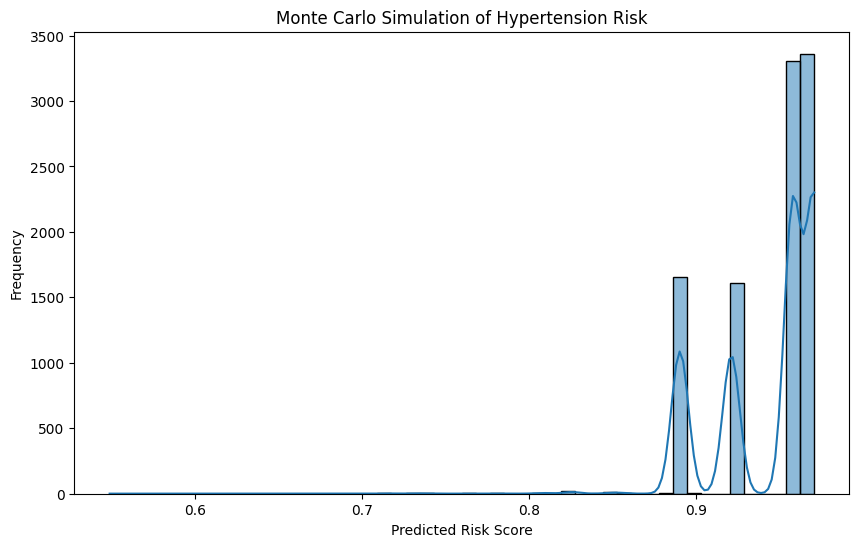

In [93]:
# Visualize uncertainty

plt.figure(figsize=(10, 6))
sns.histplot(sim_data['Hypertension_Risk'], bins=50, kde=True)
plt.title("Monte Carlo Simulation of Hypertension Risk")
plt.xlabel("Predicted Risk Score")
plt.ylabel("Frequency")
plt.show()

In [94]:
num_simulations = 1000
model_risk_estimates = {}

# Start simulation
for name, model in models.items():
    simulated_risks = []
    start_time = time.time()
    tracemalloc.start()

    for _ in range(num_simulations):
        sampled_params = np.random.normal(loc=X_train_imputed.mean(), scale=X_train_imputed.std(), size=(1, X_train_imputed.shape[1]))  # Ensure correct shape
        predicted_prob = model.predict_proba(sampled_params)[0, 1]  # Predict risk
        simulated_risks.append(predicted_prob)

    end_time = time.time()
    memory_usage = tracemalloc.get_traced_memory()[1] / (1024 * 1024)  # Convert to MB
    tracemalloc.stop()

    risk_mean = np.mean(simulated_risks)
    risk_ci = np.percentile(simulated_risks, [2.5, 97.5])

    model_risk_estimates[name] = {
        "Mean Risk": risk_mean,
        "95% CI": risk_ci,
        "Runtime (sec)": end_time - start_time,
        "Memory Usage (MB)": memory_usage
    }

# Print results
for name, stats in model_risk_estimates.items():
    print(f"Model: {name}")
    print(f"  - Mean Risk Estimate: {stats['Mean Risk']:.4f}")
    print(f"  - 95% Confidence Interval: {stats['95% CI']}")
    print(f"  - Monte Carlo Runtime: {stats['Runtime (sec)']:.4f} sec")
    print(f"  - Memory Usage: {stats['Memory Usage (MB)']:.2f} MB")
    print("-" * 50)

Model: Logistic Regression
  - Mean Risk Estimate: 0.7191
  - 95% Confidence Interval: [0.71552127 0.72281998]
  - Monte Carlo Runtime: 6.5327 sec
  - Memory Usage: 5.47 MB
--------------------------------------------------
Model: Random Forest
  - Mean Risk Estimate: 0.7106
  - 95% Confidence Interval: [0.36975 0.93025]
  - Monte Carlo Runtime: 43.6031 sec
  - Memory Usage: 5.76 MB
--------------------------------------------------
Model: XGBoost
  - Mean Risk Estimate: 0.7168
  - 95% Confidence Interval: [0.5679593  0.83764494]
  - Monte Carlo Runtime: 6.2438 sec
  - Memory Usage: 5.95 MB
--------------------------------------------------


# **Evaluation – KS Test, ECE & Brier Score**

Brier Score (Simulated Outcomes): 0.0532


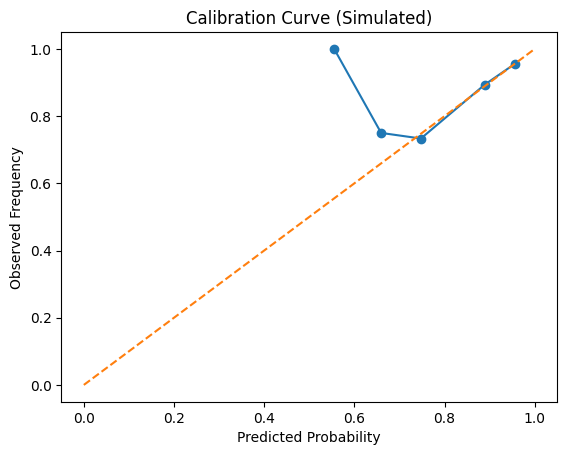

In [95]:
# Evaluate probabilistic predictions from Monte Carlo
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

y_probs = sim_data['Hypertension_Risk']  # probabilistic output

# Brier Score
brier = brier_score_loss(np.random.binomial(n=1, p=y_probs.mean(), size=len(y_probs)), y_probs)
print(f"Brier Score (Simulated Outcomes): {brier:.4f}")

# Calibration curve (optional visualization)
prob_true, prob_pred = calibration_curve(np.random.binomial(1, y_probs), y_probs, n_bins=10)

plt.plot(prob_pred, prob_true, marker='o')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("Calibration Curve (Simulated)")
plt.xlabel("Predicted Probability")
plt.ylabel("Observed Frequency")
plt.show()

In [96]:
from scipy.stats import ks_2samp
from sklearn.calibration import calibration_curve
from sklearn.metrics import brier_score_loss

evaluation_results = {}

for name, stats in model_risk_estimates.items():
    risk_mean = stats["Mean Risk"]  # Use only the mean risk estimate

    # Kolmogorov-Smirnov (KS) Test
    ks_stat, ks_p_value = ks_2samp([risk_mean] * len(y_test), y_test)  # Use constant values for KS test

    # Expected Calibration Error (ECE)
    prob_true, prob_pred = calibration_curve(y_test, np.full_like(y_test, risk_mean), n_bins=10)
    ece = np.abs(prob_true - prob_pred).mean()

    # Brier Score Decomposition
    brier_score = brier_score_loss(y_test, np.full_like(y_test, risk_mean))
    reliability = np.mean((risk_mean - y_test.mean()) ** 2)
    resolution = np.var(np.full_like(y_test, risk_mean))
    uncertainty = y_test.mean() * (1 - y_test.mean())

    evaluation_results[name] = {
        "KS Test Statistic": ks_stat,
        "KS Test P-Value": ks_p_value,
        "ECE": ece,
        "Brier Score": brier_score,
        "Reliability": reliability,
        "Resolution": resolution,
        "Uncertainty": uncertainty,
    }

# Print results
for name, results in evaluation_results.items():
    print(f"Model: {name}")
    print(f"  - KS Test: Statistic={results['KS Test Statistic']:.4f}, P-value={results['KS Test P-Value']:.4f}")
    print(f"  - Expected Calibration Error (ECE): {results['ECE']:.4f}")
    print(f"  - Brier Score: {results['Brier Score']:.4f}")
    print(f"  - Reliability Component: {results['Reliability']:.4f}")
    print(f"  - Resolution Component: {results['Resolution']:.4f}")
    print(f"  - Uncertainty Component: {results['Uncertainty']:.4f}")
    print("-" * 50)

Model: Logistic Regression
  - KS Test: Statistic=0.7174, P-value=0.0000
  - Expected Calibration Error (ECE): 0.7174
  - Brier Score: 0.7174
  - Reliability Component: 0.0000
  - Resolution Component: 0.0000
  - Uncertainty Component: 0.2027
--------------------------------------------------
Model: Random Forest
  - KS Test: Statistic=0.7174, P-value=0.0000
  - Expected Calibration Error (ECE): 0.7174
  - Brier Score: 0.7174
  - Reliability Component: 0.0000
  - Resolution Component: 0.0000
  - Uncertainty Component: 0.2027
--------------------------------------------------
Model: XGBoost
  - KS Test: Statistic=0.7174, P-value=0.0000
  - Expected Calibration Error (ECE): 0.7174
  - Brier Score: 0.7174
  - Reliability Component: 0.0000
  - Resolution Component: 0.0000
  - Uncertainty Component: 0.2027
--------------------------------------------------


# **Calibration Curves**

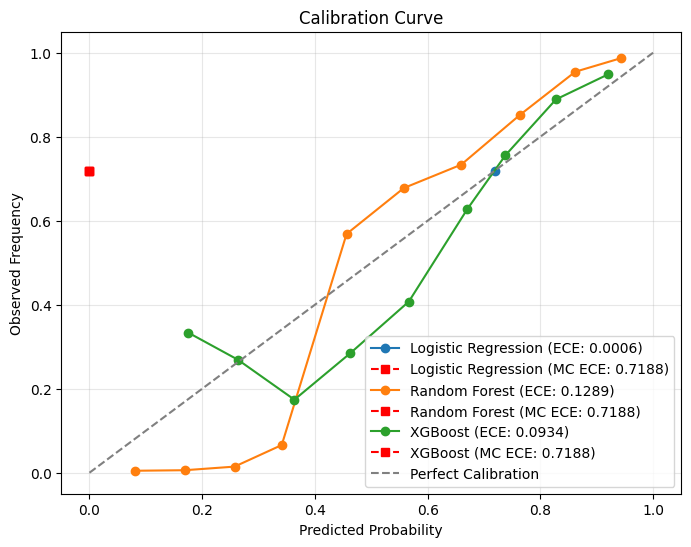

In [97]:
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

# Impute missing values in X using the same strategy as training data
imputer = SimpleImputer(strategy="mean")  # Uses mean imputation
X_imputed = imputer.fit_transform(X)

plt.figure(figsize=(8, 6))

for name, stats in model_risk_estimates.items():
    # Predict real probabilities for calibration using imputed X
    real_probs = models[name].predict_proba(X_imputed)[:, 1]
    prob_true, prob_pred = calibration_curve(y, real_probs, n_bins=10)

    plt.plot(prob_pred, prob_true, marker='o', label=f'{name} (ECE: {np.abs(prob_true - prob_pred).mean():.4f})')

    # Monte Carlo Simulation-based Risk Calibration (Using Mean Risk)
    prob_true_mc, prob_pred_mc = calibration_curve(y, np.full_like(y, stats["Mean Risk"]), n_bins=10)
    plt.plot(prob_pred_mc, prob_true_mc, marker='s', linestyle='dashed', label=f'{name} (MC ECE: {np.abs(prob_true_mc - prob_pred_mc).mean():.4f})', color='red')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfect Calibration')
plt.title('Calibration Curve')
plt.xlabel('Predicted Probability')
plt.ylabel('Observed Frequency')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

# **Density Plot**

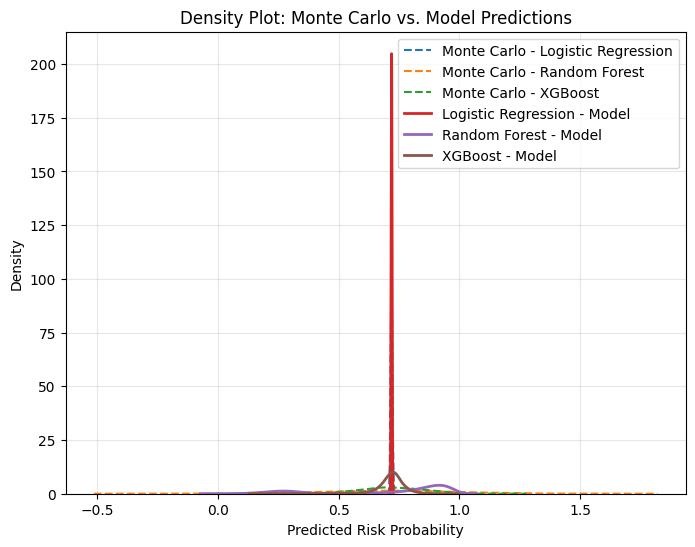

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Plot the density of simulated risks for each model
for name, stats in model_risk_estimates.items():
    simulated_risks = np.random.normal(loc=stats["Mean Risk"], scale=np.std(stats["95% CI"]), size=1000)
    sns.kdeplot(simulated_risks, label=f'Monte Carlo - {name}', linestyle='dashed')

# Plot the density of actual model predictions
for name, model in models.items():
    real_probs = model.predict_proba(X_imputed)[:, 1]
    sns.kdeplot(real_probs, label=f'{name} - Model', linewidth=2)

plt.xlabel("Predicted Risk Probability")
plt.ylabel("Density")
plt.title("Density Plot: Monte Carlo vs. Model Predictions")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# **Final Clarification: Monte Carlo is not a Predictive Model**

IMPORTANT: Monte Carlo Simulation (MCS) is used ONLY to simulate uncertainty around the predictions of trained models like Logistic Regression, Random Forest, or XGBoost. MCS is NOT a model that learns from data. It should NOT be evaluated using classification metrics. Instead, it supports uncertainty quantification, calibration checks, and robustness analysis.